In [70]:
import pandas as pd
pokemon = pd.read_csv('https://raw.githubusercontent.com/we-b/datasets_for_ai/master/pokemonn.csv')

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

AttributeError: ignored

In [25]:
import chainer
!pip install chainercv
from chainercv.links.model.faster_rcnn import FasterRCNNTrainChain

import cv2
chainer.print_runtime_info()
!pip install optuna

     |████████████████████████████████| 266kB 2.7MB/s 
  Created wheel for chainercv: filename=chainercv-0.13.1-cp36-cp36m-linux_x86_64.whl size=537350 sha256=10d07f49d9089cc4826e8ea85a9999f582b481d82e6036c49a15d2449176ffbf
  Stored in directory: /root/.cache/pip/wheels/ea/10/01/e221beaa4b3d8341aa819a39ab8d4677457c79c81f521f3a94
Successfully built chainercv
Platform: Linux-4.19.112+-x86_64-with-Ubuntu-18.04-bionic
Chainer: 7.4.0
ChainerX: Not Available
NumPy: 1.18.5
CuPy: Not Available
iDeep: 2.0.0.post3
     |████████████████████████████████| 256kB 2.8MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 81kB 5.8MB/s 
     |████████████████████████████████| 163kB 9.0MB/s 
     |████████████████████████████████| 143kB 7.7MB/s 
     |████████████████████████████████| 51kB 5.4MB/s 
     |████████████████████████████████| 112kB 12.0MB/s 
     |█████████████████████████████

In [72]:
pokemon.head()
print(pokemon.shape)
pokemon.head()

(212, 9)


,Name,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,Bulbasaur,318,45,49,49,65,65,45,False
1,Ivysaur,405,60,62,63,80,80,60,False
2,Venusaur,525,80,82,83,100,100,80,False
3,Charmander,309,39,52,43,60,50,65,False
4,Charmeleon,405,58,64,58,80,65,80,False


In [73]:
namelist=pokemon["Name"].unique()
for i in range(len(namelist)):
    pokemon["Name"]=pokemon["Name"].replace(namelist[i],str(i))
Legendarylist=pokemon["Legendary"].unique()
for i in range(len(Legendarylist)):
    pokemon["Legendary"]=pokemon["Legendary"].replace(Legendarylist[i],str(i))

In [74]:
# pokemon["Legendary"][200]

In [75]:
# pd.set_option('display.max_rows',500)
# pokemon["Legendary"]

In [76]:
# pokemon.head()
pokemon = pokemon.astype(float)
pokemon.head()

,Name,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,0.0,318.0,45.0,49.0,49.0,65.0,65.0,45.0,0.0
1,1.0,405.0,60.0,62.0,63.0,80.0,80.0,60.0,0.0
2,2.0,525.0,80.0,82.0,83.0,100.0,100.0,80.0,0.0
3,3.0,309.0,39.0,52.0,43.0,60.0,50.0,65.0,0.0
4,4.0,405.0,58.0,64.0,58.0,80.0,65.0,80.0,0.0


In [77]:
from sklearn import preprocessing
import numpy as np
pokemon[["Defense"]]=pokemon[["Defense"]].astype(float)
pokemon[["Attack"]]=pokemon[["Attack"]].astype(float)
pokemon[["Total"]]=pokemon[["Total"]].astype(float)
pokemon[["Sp. Def"]]=pokemon[["Sp. Def"]].astype(float)
pokemon[["Sp. Atk"]]=pokemon[["Sp. Atk"]].astype(float)
pokemon[["Speed"]]=pokemon[["Speed"]].astype(float)
X01 = pokemon["Total"]
X02 = pokemon["Attack"]
X03 = pokemon["Defense"]
X04 = pokemon["Sp. Atk"]
X05 = pokemon["Sp. Def"]
X06 = pokemon["Speed"]
# print(X01)
print(type(X02))

ss = preprocessing.StandardScaler()
X1 = X01**2
X2 = X03*X05
X3 = X03*X05*2
X1=X1.values
X2=X2.values
X3=X3.values

print(X1)
print(X1.shape)
X1=X1.reshape(-1,1)
X2=X2.reshape(-1,1)
X3=X3.reshape(-1,1)
print("変換後：",X1.shape)
pokemon[["Total"]] = ss.fit_transform(pokemon[["Total"]])
pokemon[["Attack"]] = ss.fit_transform(pokemon[["Attack"]])
pokemon[["Defense"]] = ss.fit_transform(pokemon[["Defense"]])
pokemon[["Sp. Atk"]] = ss.fit_transform(pokemon[["Sp. Atk"]])
pokemon[["Sp. Def"]] = ss.fit_transform(pokemon[["Sp. Def"]])
pokemon[["Speed"]] = ss.fit_transform(pokemon[["Speed"]])
# pokemon[["HP"]] = ss.fit_transform(pokemon[["HP"]])

X1 = ss.fit_transform(X1)
X2 = ss.fit_transform(X2)
X3 = ss.fit_transform(X3)

<class 'pandas.core.series.Series'>
[101124. 164025. 275625.  95481. 164025. 285156.  98596. 164025. 280900.
  38025.  42025. 156025.  38025.  42025. 156025.  63001. 121801. 229441.
  64009. 170569.  68644. 195364.  82944. 191844. 102400. 235225.  90000.
 202500.  75625. 133225. 255025.  74529. 133225. 255025. 104329. 233289.
  89401. 255025.  72900. 189225.  60025. 207025. 102400. 156025. 240100.
  81225. 164025.  93025. 202500.  70225. 164025.  84100. 193600. 102400.
 250000.  93025. 207025. 122500. 308025.  90000. 148225. 260100.  96100.
 160000. 250000.  93025. 164025. 255025.  90000. 152100. 240100. 112225.
 265225.  90000. 152100. 245025. 168100. 250000.  99225. 240100. 105625.
 216225. 123904.  96100. 211600. 105625. 225625. 105625. 250000.  93025.
 275625.  96100. 164025. 250000. 148225. 107584. 233289. 105625. 225625.
 108900. 230400. 105625. 270400. 102400. 180625. 207025. 207025. 148225.
 115600. 240100. 119025. 235225. 202500. 189225. 240100.  87025. 193600.
 102400. 202500

In [78]:
X1=X1.reshape(-1)
X2=X2.reshape(-1)
X3=X3.reshape(-1)
X1=pd.Series(X1)
X2=pd.Series(X2)
X3=pd.Series(X3)

In [79]:
X1

0     -1.060538
1     -0.593020
2      0.236459
3     -1.102480
4     -0.593020
         ...   
207    0.863585
208    1.829823
209    0.863585
210    1.624684
211    0.863585
Length: 212, dtype: float64

In [80]:
X = pokemon[['Total','Attack','Defense','Sp. Atk','Sp. Def','Speed','Legendary']]
Y = pokemon[['HP']]
X=X.astype(float)
Y=Y.astype(float)
X.head()

,Total,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,-1.126245,-1.060992,-0.916902,-0.466520,-0.401593,-1.122924,0.0
1,-0.497976,-0.684467,-0.465373,-0.076219,0.074037,-0.611040,0.0
2,0.368602,-0.105197,0.179668,0.444182,0.708210,0.071470,0.0
3,-1.191238,-0.974101,-1.110414,-0.596620,-0.877223,-0.440413,0.0
4,-0.497976,-0.626540,-0.626633,-0.076219,-0.401593,0.071470,0.0


In [81]:
X = pd.concat([X,X1,X2,X3],axis=1)
X.head()

,Total,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,0,1,2
0,-1.126245,-1.060992,-0.916902,-0.466520,-0.401593,-1.122924,0.0,-1.060538,-0.740500,-0.740500
1,-0.497976,-0.684467,-0.465373,-0.076219,0.074037,-0.611040,0.0,-0.593020,-0.317626,-0.317626
2,0.368602,-0.105197,0.179668,0.444182,0.708210,0.071470,0.0,0.236459,0.425537,0.425537
3,-1.191238,-0.974101,-1.110414,-0.596620,-0.877223,-0.440413,0.0,-1.102480,-0.976443,-0.976443
4,-0.497976,-0.626540,-0.626633,-0.076219,-0.401593,0.071470,0.0,-0.593020,-0.607141,-0.607141


In [82]:
# X=X.values
# Y=Y.values

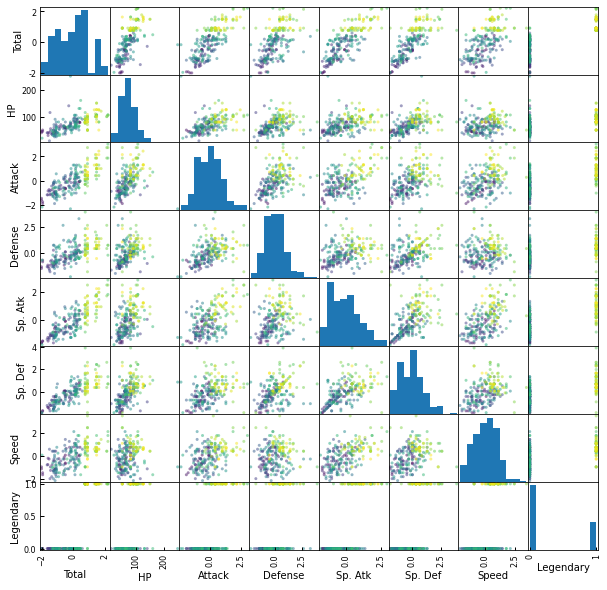

In [83]:
from sklearn.decomposition import PCA #主成分分析器
from pandas import plotting 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plotting.scatter_matrix(pokemon.iloc[:, 1:], figsize=(10, 10), c=list(pokemon.iloc[:, 0]), alpha=0.5)
plt.show()

In [84]:
X

,Total,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,0,1,2
0,-1.126245,-1.060992,-0.916902,-0.466520,-0.401593,-1.122924,0.0,-1.060538,-0.740500,-0.740500
1,-0.497976,-0.684467,-0.465373,-0.076219,0.074037,-0.611040,0.0,-0.593020,-0.317626,-0.317626
2,0.368602,-0.105197,0.179668,0.444182,0.708210,0.071470,0.0,0.236459,0.425537,0.425537
3,-1.191238,-0.974101,-1.110414,-0.596620,-0.877223,-0.440413,0.0,-1.102480,-0.976443,-0.976443
4,-0.497976,-0.626540,-0.626633,-0.076219,-0.401593,0.071470,0.0,-0.593020,-0.607141,-0.607141
...,...,...,...,...,...,...,...,...,...,...
207,0.910213,0.416145,2.340556,0.444182,2.293643,-0.952296,1.0,0.863585,3.662630,3.662630
208,1.632361,2.153952,1.050474,2.005386,1.025296,1.095237,1.0,1.829823,1.291802,1.291802
209,0.910213,0.705779,-0.562129,1.745186,1.659469,-0.269785,1.0,0.863585,0.311555,0.311555
210,1.487932,2.153952,-0.562129,2.265587,1.659469,0.071470,1.0,1.624684,0.311555,0.311555


In [185]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=0,stratify=pokemon["Legendary"])

In [186]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["font.size"] = 15
plt.rcParams['font.family'] = 'Arial'#使用するフォント
# plt.rcParams['font.sans-serif'] = ['Arial']
plt.rcParams['xtick.direction'] = 'in'#x軸の目盛線が内向き('in')か外向き('out')か双方向か('inout')
plt.rcParams['ytick.direction'] = 'in'#y軸の目盛線が内向き('in')か外向き('out')か双方向か('inout')
plt.rcParams['xtick.major.width'] = 1.0#x軸主目盛り線の線幅
plt.rcParams['ytick.major.width'] = 1.0#y軸主目盛り線の線幅
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

[I 2020-10-18 17:24:21,901] A new study created in memory with name: no-name-c4dfebab-c0bd-45c0-b9ad-29bc2d9ef2aa
feature_fraction, val_score: inf:   0%|          | 0/7 [00:00<?, ?it/s]

Training until validation scores don't improve for 100 rounds.
[50]	training's rmse: 15.8741	valid_1's rmse: 23.2213
[100]	training's rmse: 13.472	valid_1's rmse: 22.2276
[150]	training's rmse: 11.867	valid_1's rmse: 21.939
[200]	training's rmse: 10.6921	valid_1's rmse: 21.6181
[250]	training's rmse: 9.67991	valid_1's rmse: 21.3251
[300]	training's rmse: 8.9729	valid_1's rmse: 21.1788
[350]	training's rmse: 8.37759	valid_1's rmse: 21.0756


feature_fraction, val_score: 20.931906:  14%|#4        | 1/7 [00:00<00:02,  2.99it/s]

[400]	training's rmse: 7.84456	valid_1's rmse: 20.9805
[450]	training's rmse: 7.3667	valid_1's rmse: 20.9685
[500]	training's rmse: 6.96345	valid_1's rmse: 21.0466
Early stopping, best iteration is:
[433]	training's rmse: 7.51856	valid_1's rmse: 20.9319
Training until validation scores don't improve for 100 rounds.
[50]	training's rmse: 15.7841	valid_1's rmse: 22.749
[100]	training's rmse: 13.3685	valid_1's rmse: 22.0832
[150]	training's rmse: 11.8252	valid_1's rmse: 21.8454
[200]	training's rmse: 10.6822	valid_1's rmse: 21.5197
[250]	training's rmse: 9.7322	valid_1's rmse: 21.2673
[300]	training's rmse: 8.99863	valid_1's rmse: 21.1895
[350]	training's rmse: 8.47084	valid_1's rmse: 21.1027
[400]	training's rmse: 7.99941	valid_1's rmse: 21.1871
[450]	training's rmse: 7.5348	valid_1's rmse: 21.0206
[500]	training's rmse: 7.03379	valid_1's rmse: 20.9644


feature_fraction, val_score: 20.931906:  29%|##8       | 2/7 [00:00<00:01,  2.88it/s]

[550]	training's rmse: 6.69499	valid_1's rmse: 21.0939
Early stopping, best iteration is:
[482]	training's rmse: 7.18195	valid_1's rmse: 20.9348
Training until validation scores don't improve for 100 rounds.
[50]	training's rmse: 16.0322	valid_1's rmse: 22.9435
[100]	training's rmse: 13.6472	valid_1's rmse: 22.2563
[150]	training's rmse: 12.0631	valid_1's rmse: 21.8289
[200]	training's rmse: 10.8952	valid_1's rmse: 21.448
[250]	training's rmse: 9.85459	valid_1's rmse: 21.2419
[300]	training's rmse: 9.11323	valid_1's rmse: 20.9881
[350]	training's rmse: 8.44964	valid_1's rmse: 20.8501
[400]	training's rmse: 7.93007	valid_1's rmse: 20.789
[450]	training's rmse: 7.41502	valid_1's rmse: 20.7085
[500]	training's rmse: 7.00558	valid_1's rmse: 20.6609
[550]	training's rmse: 6.61841	valid_1's rmse: 20.726


feature_fraction, val_score: 20.572853:  43%|####2     | 3/7 [00:01<00:01,  2.75it/s]

Early stopping, best iteration is:
[466]	training's rmse: 7.28462	valid_1's rmse: 20.5729
Training until validation scores don't improve for 100 rounds.
[50]	training's rmse: 16.0547	valid_1's rmse: 24.1067
[100]	training's rmse: 13.6368	valid_1's rmse: 23.4373
[150]	training's rmse: 11.9769	valid_1's rmse: 22.8471
[200]	training's rmse: 10.8408	valid_1's rmse: 22.3791
[250]	training's rmse: 9.84107	valid_1's rmse: 22.046


feature_fraction, val_score: 20.572853:  57%|#####7    | 4/7 [00:01<00:01,  2.73it/s]

[300]	training's rmse: 9.1681	valid_1's rmse: 21.9903
[350]	training's rmse: 8.56142	valid_1's rmse: 21.8709
[400]	training's rmse: 8.03011	valid_1's rmse: 21.7447
[450]	training's rmse: 7.53931	valid_1's rmse: 21.6294
[500]	training's rmse: 7.09889	valid_1's rmse: 21.5098
[550]	training's rmse: 6.72869	valid_1's rmse: 21.5312
Early stopping, best iteration is:
[497]	training's rmse: 7.11525	valid_1's rmse: 21.4739
Training until validation scores don't improve for 100 rounds.
[50]	training's rmse: 16.2933	valid_1's rmse: 23.3931
[100]	training's rmse: 13.979	valid_1's rmse: 22.8139
[150]	training's rmse: 12.3949	valid_1's rmse: 22.2049
[200]	training's rmse: 11.1864	valid_1's rmse: 21.7437
[250]	training's rmse: 10.2042	valid_1's rmse: 21.5986
[300]	training's rmse: 9.45407	valid_1's rmse: 21.3177
[350]	training's rmse: 8.8112	valid_1's rmse: 21.1979
[400]	training's rmse: 8.2577	valid_1's rmse: 21.1314
[450]	training's rmse: 7.76469	valid_1's rmse: 20.9524
[500]	training's rmse: 7.37

feature_fraction, val_score: 19.889023:  71%|#######1  | 5/7 [00:02<00:01,  1.90it/s]

Training until validation scores don't improve for 100 rounds.
[50]	training's rmse: 15.7074	valid_1's rmse: 23.2462
[100]	training's rmse: 13.393	valid_1's rmse: 22.7829
[150]	training's rmse: 11.7186	valid_1's rmse: 22.1374
[200]	training's rmse: 10.51	valid_1's rmse: 21.9098
[250]	training's rmse: 9.70423	valid_1's rmse: 21.8345
[300]	training's rmse: 9.0143	valid_1's rmse: 21.7948


feature_fraction, val_score: 19.889023:  86%|########5 | 6/7 [00:02<00:00,  2.20it/s]

[350]	training's rmse: 8.44471	valid_1's rmse: 21.7822
[400]	training's rmse: 7.9681	valid_1's rmse: 21.787
Early stopping, best iteration is:
[335]	training's rmse: 8.58822	valid_1's rmse: 21.731
Training until validation scores don't improve for 100 rounds.
[50]	training's rmse: 15.7623	valid_1's rmse: 22.9043
[100]	training's rmse: 13.4265	valid_1's rmse: 22.4965
[150]	training's rmse: 11.8144	valid_1's rmse: 21.9847
[200]	training's rmse: 10.6477	valid_1's rmse: 21.7885


num_leaves, val_score: 19.889023:   0%|          | 0/20 [00:00<?, ?it/s]

[250]	training's rmse: 9.75539	valid_1's rmse: 21.7293
[300]	training's rmse: 9.02682	valid_1's rmse: 21.4383
[350]	training's rmse: 8.43859	valid_1's rmse: 21.4204
[400]	training's rmse: 8.00359	valid_1's rmse: 21.3578
[450]	training's rmse: 7.49756	valid_1's rmse: 21.4175
Early stopping, best iteration is:
[366]	training's rmse: 8.29099	valid_1's rmse: 21.3305
Training until validation scores don't improve for 100 rounds.
[50]	training's rmse: 16.2933	valid_1's rmse: 23.3931
[100]	training's rmse: 13.979	valid_1's rmse: 22.8139
[150]	training's rmse: 12.3949	valid_1's rmse: 22.2049
[200]	training's rmse: 11.1864	valid_1's rmse: 21.7437
[250]	training's rmse: 10.2042	valid_1's rmse: 21.5986
[300]	training's rmse: 9.45407	valid_1's rmse: 21.3177
[350]	training's rmse: 8.8112	valid_1's rmse: 21.1979
[400]	training's rmse: 8.2577	valid_1's rmse: 21.1314
[450]	training's rmse: 7.76469	valid_1's rmse: 20.9524
[500]	training's rmse: 7.37803	valid_1's rmse: 20.8742
[550]	training's rmse: 6.9

num_leaves, val_score: 19.889023:   5%|5         | 1/20 [00:00<00:17,  1.09it/s]

Training until validation scores don't improve for 100 rounds.
[50]	training's rmse: 16.2933	valid_1's rmse: 23.3931
[100]	training's rmse: 13.979	valid_1's rmse: 22.8139
[150]	training's rmse: 12.3949	valid_1's rmse: 22.2049
[200]	training's rmse: 11.1864	valid_1's rmse: 21.7437
[250]	training's rmse: 10.2042	valid_1's rmse: 21.5986
[300]	training's rmse: 9.45407	valid_1's rmse: 21.3177
[350]	training's rmse: 8.8112	valid_1's rmse: 21.1979
[400]	training's rmse: 8.2577	valid_1's rmse: 21.1314
[450]	training's rmse: 7.76469	valid_1's rmse: 20.9524
[500]	training's rmse: 7.37803	valid_1's rmse: 20.8742
[550]	training's rmse: 6.98696	valid_1's rmse: 20.8512
[600]	training's rmse: 6.65444	valid_1's rmse: 20.7757
[650]	training's rmse: 6.38052	valid_1's rmse: 20.7661
[700]	training's rmse: 6.09956	valid_1's rmse: 20.6959
[750]	training's rmse: 5.855	valid_1's rmse: 20.6092
[800]	training's rmse: 5.63838	valid_1's rmse: 20.5601
[850]	training's rmse: 5.44964	valid_1's rmse: 20.4705
[900]	tr

num_leaves, val_score: 19.889023:  10%|#         | 2/20 [00:01<00:16,  1.09it/s]

Early stopping, best iteration is:
[1433]	training's rmse: 4.11067	valid_1's rmse: 19.889
Training until validation scores don't improve for 100 rounds.
[50]	training's rmse: 16.2933	valid_1's rmse: 23.3931
[100]	training's rmse: 13.979	valid_1's rmse: 22.8139
[150]	training's rmse: 12.3949	valid_1's rmse: 22.2049
[200]	training's rmse: 11.1864	valid_1's rmse: 21.7437
[250]	training's rmse: 10.2042	valid_1's rmse: 21.5986
[300]	training's rmse: 9.45407	valid_1's rmse: 21.3177
[350]	training's rmse: 8.8112	valid_1's rmse: 21.1979
[400]	training's rmse: 8.2577	valid_1's rmse: 21.1314
[450]	training's rmse: 7.76469	valid_1's rmse: 20.9524
[500]	training's rmse: 7.37803	valid_1's rmse: 20.8742
[550]	training's rmse: 6.98696	valid_1's rmse: 20.8512
[600]	training's rmse: 6.65444	valid_1's rmse: 20.7757
[650]	training's rmse: 6.38052	valid_1's rmse: 20.7661
[700]	training's rmse: 6.09956	valid_1's rmse: 20.6959
[750]	training's rmse: 5.855	valid_1's rmse: 20.6092
[800]	training's rmse: 5.638

num_leaves, val_score: 19.889023:  15%|#5        | 3/20 [00:02<00:15,  1.09it/s]

[1450]	training's rmse: 4.08188	valid_1's rmse: 19.9198
[1500]	training's rmse: 3.9867	valid_1's rmse: 19.923
Early stopping, best iteration is:
[1433]	training's rmse: 4.11067	valid_1's rmse: 19.889
Training until validation scores don't improve for 100 rounds.
[50]	training's rmse: 16.2933	valid_1's rmse: 23.3931
[100]	training's rmse: 13.979	valid_1's rmse: 22.8139
[150]	training's rmse: 12.3949	valid_1's rmse: 22.2049
[200]	training's rmse: 11.1864	valid_1's rmse: 21.7437
[250]	training's rmse: 10.2042	valid_1's rmse: 21.5986
[300]	training's rmse: 9.45407	valid_1's rmse: 21.3177
[350]	training's rmse: 8.8112	valid_1's rmse: 21.1979
[400]	training's rmse: 8.2577	valid_1's rmse: 21.1314
[450]	training's rmse: 7.76469	valid_1's rmse: 20.9524
[500]	training's rmse: 7.37803	valid_1's rmse: 20.8742
[550]	training's rmse: 6.98696	valid_1's rmse: 20.8512
[600]	training's rmse: 6.65444	valid_1's rmse: 20.7757
[650]	training's rmse: 6.38052	valid_1's rmse: 20.7661
[700]	training's rmse: 6.0

num_leaves, val_score: 19.889023:  20%|##        | 4/20 [00:03<00:14,  1.09it/s]

[1400]	training's rmse: 4.17005	valid_1's rmse: 19.9295
[1450]	training's rmse: 4.08188	valid_1's rmse: 19.9198
[1500]	training's rmse: 3.9867	valid_1's rmse: 19.923
Early stopping, best iteration is:
[1433]	training's rmse: 4.11067	valid_1's rmse: 19.889
Training until validation scores don't improve for 100 rounds.
[50]	training's rmse: 16.2933	valid_1's rmse: 23.3931
[100]	training's rmse: 13.979	valid_1's rmse: 22.8139
[150]	training's rmse: 12.3949	valid_1's rmse: 22.2049
[200]	training's rmse: 11.1864	valid_1's rmse: 21.7437
[250]	training's rmse: 10.2042	valid_1's rmse: 21.5986
[300]	training's rmse: 9.45407	valid_1's rmse: 21.3177
[350]	training's rmse: 8.8112	valid_1's rmse: 21.1979
[400]	training's rmse: 8.2577	valid_1's rmse: 21.1314
[450]	training's rmse: 7.76469	valid_1's rmse: 20.9524
[500]	training's rmse: 7.37803	valid_1's rmse: 20.8742
[550]	training's rmse: 6.98696	valid_1's rmse: 20.8512
[600]	training's rmse: 6.65444	valid_1's rmse: 20.7757
[650]	training's rmse: 6.

num_leaves, val_score: 19.889023:  25%|##5       | 5/20 [00:04<00:13,  1.10it/s]

[1400]	training's rmse: 4.17005	valid_1's rmse: 19.9295
[1450]	training's rmse: 4.08188	valid_1's rmse: 19.9198
[1500]	training's rmse: 3.9867	valid_1's rmse: 19.923
Early stopping, best iteration is:
[1433]	training's rmse: 4.11067	valid_1's rmse: 19.889
Training until validation scores don't improve for 100 rounds.
[50]	training's rmse: 16.2933	valid_1's rmse: 23.3931
[100]	training's rmse: 13.979	valid_1's rmse: 22.8139
[150]	training's rmse: 12.3949	valid_1's rmse: 22.2049
[200]	training's rmse: 11.1864	valid_1's rmse: 21.7437
[250]	training's rmse: 10.2042	valid_1's rmse: 21.5986
[300]	training's rmse: 9.45407	valid_1's rmse: 21.3177
[350]	training's rmse: 8.8112	valid_1's rmse: 21.1979
[400]	training's rmse: 8.2577	valid_1's rmse: 21.1314
[450]	training's rmse: 7.76469	valid_1's rmse: 20.9524
[500]	training's rmse: 7.37803	valid_1's rmse: 20.8742
[550]	training's rmse: 6.98696	valid_1's rmse: 20.8512
[600]	training's rmse: 6.65444	valid_1's rmse: 20.7757
[650]	training's rmse: 6.

num_leaves, val_score: 19.889023:  30%|###       | 6/20 [00:05<00:12,  1.08it/s]

Training until validation scores don't improve for 100 rounds.
[50]	training's rmse: 16.2933	valid_1's rmse: 23.3931
[100]	training's rmse: 13.979	valid_1's rmse: 22.8139
[150]	training's rmse: 12.3949	valid_1's rmse: 22.2049
[200]	training's rmse: 11.1864	valid_1's rmse: 21.7437
[250]	training's rmse: 10.2042	valid_1's rmse: 21.5986
[300]	training's rmse: 9.45407	valid_1's rmse: 21.3177
[350]	training's rmse: 8.8112	valid_1's rmse: 21.1979
[400]	training's rmse: 8.2577	valid_1's rmse: 21.1314
[450]	training's rmse: 7.76469	valid_1's rmse: 20.9524
[500]	training's rmse: 7.37803	valid_1's rmse: 20.8742
[550]	training's rmse: 6.98696	valid_1's rmse: 20.8512
[600]	training's rmse: 6.65444	valid_1's rmse: 20.7757
[650]	training's rmse: 6.38052	valid_1's rmse: 20.7661
[700]	training's rmse: 6.09956	valid_1's rmse: 20.6959
[750]	training's rmse: 5.855	valid_1's rmse: 20.6092
[800]	training's rmse: 5.63838	valid_1's rmse: 20.5601
[850]	training's rmse: 5.44964	valid_1's rmse: 20.4705
[900]	tr

num_leaves, val_score: 19.889023:  35%|###5      | 7/20 [00:06<00:12,  1.08it/s]

Training until validation scores don't improve for 100 rounds.
[50]	training's rmse: 16.2933	valid_1's rmse: 23.3931
[100]	training's rmse: 13.979	valid_1's rmse: 22.8139
[150]	training's rmse: 12.3949	valid_1's rmse: 22.2049
[200]	training's rmse: 11.1864	valid_1's rmse: 21.7437
[250]	training's rmse: 10.2042	valid_1's rmse: 21.5986
[300]	training's rmse: 9.45407	valid_1's rmse: 21.3177
[350]	training's rmse: 8.8112	valid_1's rmse: 21.1979
[400]	training's rmse: 8.2577	valid_1's rmse: 21.1314
[450]	training's rmse: 7.76469	valid_1's rmse: 20.9524
[500]	training's rmse: 7.37803	valid_1's rmse: 20.8742
[550]	training's rmse: 6.98696	valid_1's rmse: 20.8512
[600]	training's rmse: 6.65444	valid_1's rmse: 20.7757
[650]	training's rmse: 6.38052	valid_1's rmse: 20.7661
[700]	training's rmse: 6.09956	valid_1's rmse: 20.6959
[750]	training's rmse: 5.855	valid_1's rmse: 20.6092
[800]	training's rmse: 5.63838	valid_1's rmse: 20.5601
[850]	training's rmse: 5.44964	valid_1's rmse: 20.4705
[900]	tr

num_leaves, val_score: 19.889023:  40%|####      | 8/20 [00:07<00:11,  1.08it/s]

Early stopping, best iteration is:
[1433]	training's rmse: 4.11067	valid_1's rmse: 19.889
Training until validation scores don't improve for 100 rounds.
[50]	training's rmse: 16.2933	valid_1's rmse: 23.3931
[100]	training's rmse: 13.979	valid_1's rmse: 22.8139
[150]	training's rmse: 12.3949	valid_1's rmse: 22.2049
[200]	training's rmse: 11.1864	valid_1's rmse: 21.7437
[250]	training's rmse: 10.2042	valid_1's rmse: 21.5986
[300]	training's rmse: 9.45407	valid_1's rmse: 21.3177
[350]	training's rmse: 8.8112	valid_1's rmse: 21.1979
[400]	training's rmse: 8.2577	valid_1's rmse: 21.1314
[450]	training's rmse: 7.76469	valid_1's rmse: 20.9524
[500]	training's rmse: 7.37803	valid_1's rmse: 20.8742
[550]	training's rmse: 6.98696	valid_1's rmse: 20.8512
[600]	training's rmse: 6.65444	valid_1's rmse: 20.7757
[650]	training's rmse: 6.38052	valid_1's rmse: 20.7661
[700]	training's rmse: 6.09956	valid_1's rmse: 20.6959
[750]	training's rmse: 5.855	valid_1's rmse: 20.6092
[800]	training's rmse: 5.638

num_leaves, val_score: 19.889023:  45%|####5     | 9/20 [00:08<00:10,  1.08it/s]

[1400]	training's rmse: 4.17005	valid_1's rmse: 19.9295
[1450]	training's rmse: 4.08188	valid_1's rmse: 19.9198
[1500]	training's rmse: 3.9867	valid_1's rmse: 19.923
Early stopping, best iteration is:
[1433]	training's rmse: 4.11067	valid_1's rmse: 19.889
Training until validation scores don't improve for 100 rounds.
[50]	training's rmse: 16.2933	valid_1's rmse: 23.3931
[100]	training's rmse: 13.979	valid_1's rmse: 22.8139
[150]	training's rmse: 12.3949	valid_1's rmse: 22.2049
[200]	training's rmse: 11.1864	valid_1's rmse: 21.7437
[250]	training's rmse: 10.2042	valid_1's rmse: 21.5986
[300]	training's rmse: 9.45407	valid_1's rmse: 21.3177
[350]	training's rmse: 8.8112	valid_1's rmse: 21.1979
[400]	training's rmse: 8.2577	valid_1's rmse: 21.1314
[450]	training's rmse: 7.76469	valid_1's rmse: 20.9524
[500]	training's rmse: 7.37803	valid_1's rmse: 20.8742
[550]	training's rmse: 6.98696	valid_1's rmse: 20.8512
[600]	training's rmse: 6.65444	valid_1's rmse: 20.7757
[650]	training's rmse: 6.

num_leaves, val_score: 19.889023:  50%|#####     | 10/20 [00:09<00:09,  1.09it/s]

[1300]	training's rmse: 4.33413	valid_1's rmse: 19.9952
[1350]	training's rmse: 4.24744	valid_1's rmse: 19.9598
[1400]	training's rmse: 4.17005	valid_1's rmse: 19.9295
[1450]	training's rmse: 4.08188	valid_1's rmse: 19.9198
[1500]	training's rmse: 3.9867	valid_1's rmse: 19.923
Early stopping, best iteration is:
[1433]	training's rmse: 4.11067	valid_1's rmse: 19.889
Training until validation scores don't improve for 100 rounds.
[50]	training's rmse: 16.2933	valid_1's rmse: 23.3931
[100]	training's rmse: 13.979	valid_1's rmse: 22.8139
[150]	training's rmse: 12.3949	valid_1's rmse: 22.2049
[200]	training's rmse: 11.1864	valid_1's rmse: 21.7437
[250]	training's rmse: 10.2042	valid_1's rmse: 21.5986
[300]	training's rmse: 9.45407	valid_1's rmse: 21.3177
[350]	training's rmse: 8.8112	valid_1's rmse: 21.1979
[400]	training's rmse: 8.2577	valid_1's rmse: 21.1314
[450]	training's rmse: 7.76469	valid_1's rmse: 20.9524
[500]	training's rmse: 7.37803	valid_1's rmse: 20.8742
[550]	training's rmse: 

num_leaves, val_score: 19.889023:  55%|#####5    | 11/20 [00:10<00:08,  1.09it/s]

Training until validation scores don't improve for 100 rounds.
[50]	training's rmse: 16.2933	valid_1's rmse: 23.3931
[100]	training's rmse: 13.979	valid_1's rmse: 22.8139
[150]	training's rmse: 12.3949	valid_1's rmse: 22.2049
[200]	training's rmse: 11.1864	valid_1's rmse: 21.7437
[250]	training's rmse: 10.2042	valid_1's rmse: 21.5986
[300]	training's rmse: 9.45407	valid_1's rmse: 21.3177
[350]	training's rmse: 8.8112	valid_1's rmse: 21.1979
[400]	training's rmse: 8.2577	valid_1's rmse: 21.1314
[450]	training's rmse: 7.76469	valid_1's rmse: 20.9524
[500]	training's rmse: 7.37803	valid_1's rmse: 20.8742
[550]	training's rmse: 6.98696	valid_1's rmse: 20.8512
[600]	training's rmse: 6.65444	valid_1's rmse: 20.7757
[650]	training's rmse: 6.38052	valid_1's rmse: 20.7661
[700]	training's rmse: 6.09956	valid_1's rmse: 20.6959
[750]	training's rmse: 5.855	valid_1's rmse: 20.6092
[800]	training's rmse: 5.63838	valid_1's rmse: 20.5601
[850]	training's rmse: 5.44964	valid_1's rmse: 20.4705
[900]	tr

num_leaves, val_score: 19.889023:  60%|######    | 12/20 [00:11<00:07,  1.05it/s]

[1400]	training's rmse: 4.17005	valid_1's rmse: 19.9295
[1450]	training's rmse: 4.08188	valid_1's rmse: 19.9198
[1500]	training's rmse: 3.9867	valid_1's rmse: 19.923
Early stopping, best iteration is:
[1433]	training's rmse: 4.11067	valid_1's rmse: 19.889
Training until validation scores don't improve for 100 rounds.
[50]	training's rmse: 16.2933	valid_1's rmse: 23.3931
[100]	training's rmse: 13.979	valid_1's rmse: 22.8139
[150]	training's rmse: 12.3949	valid_1's rmse: 22.2049
[200]	training's rmse: 11.1864	valid_1's rmse: 21.7437
[250]	training's rmse: 10.2042	valid_1's rmse: 21.5986
[300]	training's rmse: 9.45407	valid_1's rmse: 21.3177
[350]	training's rmse: 8.8112	valid_1's rmse: 21.1979
[400]	training's rmse: 8.2577	valid_1's rmse: 21.1314
[450]	training's rmse: 7.76469	valid_1's rmse: 20.9524
[500]	training's rmse: 7.37803	valid_1's rmse: 20.8742
[550]	training's rmse: 6.98696	valid_1's rmse: 20.8512
[600]	training's rmse: 6.65444	valid_1's rmse: 20.7757
[650]	training's rmse: 6.

num_leaves, val_score: 19.889023:  65%|######5   | 13/20 [00:12<00:06,  1.08it/s]

[1350]	training's rmse: 4.24744	valid_1's rmse: 19.9598
[1400]	training's rmse: 4.17005	valid_1's rmse: 19.9295
[1450]	training's rmse: 4.08188	valid_1's rmse: 19.9198
[1500]	training's rmse: 3.9867	valid_1's rmse: 19.923
Early stopping, best iteration is:
[1433]	training's rmse: 4.11067	valid_1's rmse: 19.889
Training until validation scores don't improve for 100 rounds.
[50]	training's rmse: 16.2933	valid_1's rmse: 23.3931
[100]	training's rmse: 13.979	valid_1's rmse: 22.8139
[150]	training's rmse: 12.3949	valid_1's rmse: 22.2049
[200]	training's rmse: 11.1864	valid_1's rmse: 21.7437
[250]	training's rmse: 10.2042	valid_1's rmse: 21.5986
[300]	training's rmse: 9.45407	valid_1's rmse: 21.3177
[350]	training's rmse: 8.8112	valid_1's rmse: 21.1979
[400]	training's rmse: 8.2577	valid_1's rmse: 21.1314
[450]	training's rmse: 7.76469	valid_1's rmse: 20.9524
[500]	training's rmse: 7.37803	valid_1's rmse: 20.8742
[550]	training's rmse: 6.98696	valid_1's rmse: 20.8512
[600]	training's rmse: 6

num_leaves, val_score: 19.889023:  70%|#######   | 14/20 [00:12<00:05,  1.09it/s]

[1300]	training's rmse: 4.33413	valid_1's rmse: 19.9952
[1350]	training's rmse: 4.24744	valid_1's rmse: 19.9598
[1400]	training's rmse: 4.17005	valid_1's rmse: 19.9295
[1450]	training's rmse: 4.08188	valid_1's rmse: 19.9198
[1500]	training's rmse: 3.9867	valid_1's rmse: 19.923
Early stopping, best iteration is:
[1433]	training's rmse: 4.11067	valid_1's rmse: 19.889
Training until validation scores don't improve for 100 rounds.
[50]	training's rmse: 16.2933	valid_1's rmse: 23.3931
[100]	training's rmse: 13.979	valid_1's rmse: 22.8139
[150]	training's rmse: 12.3949	valid_1's rmse: 22.2049
[200]	training's rmse: 11.1864	valid_1's rmse: 21.7437
[250]	training's rmse: 10.2042	valid_1's rmse: 21.5986
[300]	training's rmse: 9.45407	valid_1's rmse: 21.3177
[350]	training's rmse: 8.8112	valid_1's rmse: 21.1979
[400]	training's rmse: 8.2577	valid_1's rmse: 21.1314
[450]	training's rmse: 7.76469	valid_1's rmse: 20.9524
[500]	training's rmse: 7.37803	valid_1's rmse: 20.8742
[550]	training's rmse: 

num_leaves, val_score: 19.889023:  75%|#######5  | 15/20 [00:13<00:04,  1.11it/s]

[1250]	training's rmse: 4.42818	valid_1's rmse: 20.0144
[1300]	training's rmse: 4.33413	valid_1's rmse: 19.9952
[1350]	training's rmse: 4.24744	valid_1's rmse: 19.9598
[1400]	training's rmse: 4.17005	valid_1's rmse: 19.9295
[1450]	training's rmse: 4.08188	valid_1's rmse: 19.9198
[1500]	training's rmse: 3.9867	valid_1's rmse: 19.923
Early stopping, best iteration is:
[1433]	training's rmse: 4.11067	valid_1's rmse: 19.889


[I 2020-10-18 17:24:38,724] Trial 21 finished with value: 19.889023044837344 and parameters: {'num_leaves': 9}. Best is trial 7 with value: 19.889023044837344.
num_leaves, val_score: 19.889023:  75%|#######5  | 15/20 [00:13<00:04,  1.11it/s]

Training until validation scores don't improve for 100 rounds.
[50]	training's rmse: 16.2933	valid_1's rmse: 23.3931
[100]	training's rmse: 13.979	valid_1's rmse: 22.8139
[150]	training's rmse: 12.3949	valid_1's rmse: 22.2049
[200]	training's rmse: 11.1864	valid_1's rmse: 21.7437
[250]	training's rmse: 10.2042	valid_1's rmse: 21.5986
[300]	training's rmse: 9.45407	valid_1's rmse: 21.3177
[350]	training's rmse: 8.8112	valid_1's rmse: 21.1979
[400]	training's rmse: 8.2577	valid_1's rmse: 21.1314
[450]	training's rmse: 7.76469	valid_1's rmse: 20.9524
[500]	training's rmse: 7.37803	valid_1's rmse: 20.8742
[550]	training's rmse: 6.98696	valid_1's rmse: 20.8512
[600]	training's rmse: 6.65444	valid_1's rmse: 20.7757
[650]	training's rmse: 6.38052	valid_1's rmse: 20.7661
[700]	training's rmse: 6.09956	valid_1's rmse: 20.6959
[750]	training's rmse: 5.855	valid_1's rmse: 20.6092
[800]	training's rmse: 5.63838	valid_1's rmse: 20.5601
[850]	training's rmse: 5.44964	valid_1's rmse: 20.4705
[900]	tr

num_leaves, val_score: 19.889023:  80%|########  | 16/20 [00:14<00:03,  1.11it/s]

Training until validation scores don't improve for 100 rounds.
[50]	training's rmse: 16.2933	valid_1's rmse: 23.3931
[100]	training's rmse: 13.979	valid_1's rmse: 22.8139
[150]	training's rmse: 12.3949	valid_1's rmse: 22.2049
[200]	training's rmse: 11.1864	valid_1's rmse: 21.7437
[250]	training's rmse: 10.2042	valid_1's rmse: 21.5986
[300]	training's rmse: 9.45407	valid_1's rmse: 21.3177
[350]	training's rmse: 8.8112	valid_1's rmse: 21.1979
[400]	training's rmse: 8.2577	valid_1's rmse: 21.1314
[450]	training's rmse: 7.76469	valid_1's rmse: 20.9524
[500]	training's rmse: 7.37803	valid_1's rmse: 20.8742
[550]	training's rmse: 6.98696	valid_1's rmse: 20.8512
[600]	training's rmse: 6.65444	valid_1's rmse: 20.7757
[650]	training's rmse: 6.38052	valid_1's rmse: 20.7661
[700]	training's rmse: 6.09956	valid_1's rmse: 20.6959
[750]	training's rmse: 5.855	valid_1's rmse: 20.6092
[800]	training's rmse: 5.63838	valid_1's rmse: 20.5601
[850]	training's rmse: 5.44964	valid_1's rmse: 20.4705
[900]	tr

num_leaves, val_score: 19.889023:  85%|########5 | 17/20 [00:15<00:02,  1.10it/s]

Training until validation scores don't improve for 100 rounds.
[50]	training's rmse: 16.2933	valid_1's rmse: 23.3931
[100]	training's rmse: 13.979	valid_1's rmse: 22.8139
[150]	training's rmse: 12.3949	valid_1's rmse: 22.2049
[200]	training's rmse: 11.1864	valid_1's rmse: 21.7437
[250]	training's rmse: 10.2042	valid_1's rmse: 21.5986
[300]	training's rmse: 9.45407	valid_1's rmse: 21.3177
[350]	training's rmse: 8.8112	valid_1's rmse: 21.1979
[400]	training's rmse: 8.2577	valid_1's rmse: 21.1314
[450]	training's rmse: 7.76469	valid_1's rmse: 20.9524
[500]	training's rmse: 7.37803	valid_1's rmse: 20.8742
[550]	training's rmse: 6.98696	valid_1's rmse: 20.8512
[600]	training's rmse: 6.65444	valid_1's rmse: 20.7757
[650]	training's rmse: 6.38052	valid_1's rmse: 20.7661
[700]	training's rmse: 6.09956	valid_1's rmse: 20.6959
[750]	training's rmse: 5.855	valid_1's rmse: 20.6092
[800]	training's rmse: 5.63838	valid_1's rmse: 20.5601
[850]	training's rmse: 5.44964	valid_1's rmse: 20.4705
[900]	tr

num_leaves, val_score: 19.889023:  90%|######### | 18/20 [00:16<00:01,  1.08it/s]

Early stopping, best iteration is:
[1433]	training's rmse: 4.11067	valid_1's rmse: 19.889
Training until validation scores don't improve for 100 rounds.
[50]	training's rmse: 16.2933	valid_1's rmse: 23.3931
[100]	training's rmse: 13.979	valid_1's rmse: 22.8139
[150]	training's rmse: 12.3949	valid_1's rmse: 22.2049
[200]	training's rmse: 11.1864	valid_1's rmse: 21.7437
[250]	training's rmse: 10.2042	valid_1's rmse: 21.5986
[300]	training's rmse: 9.45407	valid_1's rmse: 21.3177
[350]	training's rmse: 8.8112	valid_1's rmse: 21.1979
[400]	training's rmse: 8.2577	valid_1's rmse: 21.1314
[450]	training's rmse: 7.76469	valid_1's rmse: 20.9524
[500]	training's rmse: 7.37803	valid_1's rmse: 20.8742
[550]	training's rmse: 6.98696	valid_1's rmse: 20.8512
[600]	training's rmse: 6.65444	valid_1's rmse: 20.7757
[650]	training's rmse: 6.38052	valid_1's rmse: 20.7661
[700]	training's rmse: 6.09956	valid_1's rmse: 20.6959
[750]	training's rmse: 5.855	valid_1's rmse: 20.6092
[800]	training's rmse: 5.638

num_leaves, val_score: 19.889023:  95%|#########5| 19/20 [00:17<00:00,  1.09it/s]

[1450]	training's rmse: 4.08188	valid_1's rmse: 19.9198
[1500]	training's rmse: 3.9867	valid_1's rmse: 19.923
Early stopping, best iteration is:
[1433]	training's rmse: 4.11067	valid_1's rmse: 19.889
Training until validation scores don't improve for 100 rounds.
[50]	training's rmse: 16.2933	valid_1's rmse: 23.3931
[100]	training's rmse: 13.979	valid_1's rmse: 22.8139
[150]	training's rmse: 12.3949	valid_1's rmse: 22.2049
[200]	training's rmse: 11.1864	valid_1's rmse: 21.7437
[250]	training's rmse: 10.2042	valid_1's rmse: 21.5986
[300]	training's rmse: 9.45407	valid_1's rmse: 21.3177
[350]	training's rmse: 8.8112	valid_1's rmse: 21.1979
[400]	training's rmse: 8.2577	valid_1's rmse: 21.1314
[450]	training's rmse: 7.76469	valid_1's rmse: 20.9524
[500]	training's rmse: 7.37803	valid_1's rmse: 20.8742
[550]	training's rmse: 6.98696	valid_1's rmse: 20.8512
[600]	training's rmse: 6.65444	valid_1's rmse: 20.7757
[650]	training's rmse: 6.38052	valid_1's rmse: 20.7661
[700]	training's rmse: 6.0

bagging, val_score: 19.889023:   0%|          | 0/10 [00:00<?, ?it/s]

[1400]	training's rmse: 4.17005	valid_1's rmse: 19.9295
[1450]	training's rmse: 4.08188	valid_1's rmse: 19.9198
[1500]	training's rmse: 3.9867	valid_1's rmse: 19.923
Early stopping, best iteration is:
[1433]	training's rmse: 4.11067	valid_1's rmse: 19.889
Training until validation scores don't improve for 100 rounds.
[50]	training's rmse: 16.8425	valid_1's rmse: 22.993
[100]	training's rmse: 14.6262	valid_1's rmse: 21.9478
[150]	training's rmse: 13.0659	valid_1's rmse: 21.0277
[200]	training's rmse: 11.9734	valid_1's rmse: 20.2599
[250]	training's rmse: 10.9989	valid_1's rmse: 19.9314
[300]	training's rmse: 10.154	valid_1's rmse: 19.5256
[350]	training's rmse: 9.46889	valid_1's rmse: 19.1359
[400]	training's rmse: 8.83795	valid_1's rmse: 18.8626
[450]	training's rmse: 8.27597	valid_1's rmse: 18.4947


bagging, val_score: 17.891522:  10%|#         | 1/10 [00:00<00:03,  2.28it/s]

[500]	training's rmse: 7.81467	valid_1's rmse: 18.4006
[550]	training's rmse: 7.45586	valid_1's rmse: 18.1877
[600]	training's rmse: 7.14519	valid_1's rmse: 18.0841
[650]	training's rmse: 6.82964	valid_1's rmse: 17.974
[700]	training's rmse: 6.57885	valid_1's rmse: 18.0317
[750]	training's rmse: 6.35217	valid_1's rmse: 18.0739
Early stopping, best iteration is:
[682]	training's rmse: 6.67453	valid_1's rmse: 17.8915
Training until validation scores don't improve for 100 rounds.
[50]	training's rmse: 16.635	valid_1's rmse: 22.8114
[100]	training's rmse: 14.2936	valid_1's rmse: 22.0243
[150]	training's rmse: 12.7483	valid_1's rmse: 21.1707
[200]	training's rmse: 11.6831	valid_1's rmse: 20.4672
[250]	training's rmse: 10.7132	valid_1's rmse: 20.0325
[300]	training's rmse: 9.86292	valid_1's rmse: 19.5982
[350]	training's rmse: 9.21984	valid_1's rmse: 19.2752
[400]	training's rmse: 8.61484	valid_1's rmse: 19.121
[450]	training's rmse: 8.08665	valid_1's rmse: 19.055

bagging, val_score: 17.891522:  20%|##        | 2/10 [00:00<00:03,  2.28it/s]


[500]	training's rmse: 7.62364	valid_1's rmse: 18.8
[550]	training's rmse: 7.27712	valid_1's rmse: 18.6649
[600]	training's rmse: 6.98174	valid_1's rmse: 18.5798
[650]	training's rmse: 6.68189	valid_1's rmse: 18.4669
[700]	training's rmse: 6.43192	valid_1's rmse: 18.519
[750]	training's rmse: 6.18607	valid_1's rmse: 18.4469
Early stopping, best iteration is:
[667]	training's rmse: 6.59876	valid_1's rmse: 18.2991
Training until validation scores don't improve for 100 rounds.
[50]	training's rmse: 16.8581	valid_1's rmse: 22.8532
[100]	training's rmse: 14.4838	valid_1's rmse: 21.7793
[150]	training's rmse: 12.9308	valid_1's rmse: 21.1243
[200]	training's rmse: 11.8489	valid_1's rmse: 20.294
[250]	training's rmse: 10.8239	valid_1's rmse: 19.9677
[300]	training's rmse: 9.91336	valid_1's rmse: 19.5754
[350]	training's rmse: 9.26373	valid_1's rmse: 19.2061
[400]	training's rmse: 8.63931	valid_1's rmse: 19.045
[450]	training's rmse: 8.07263	valid_1's rmse: 18.8058
[500]	training's rmse: 7.629

bagging, val_score: 17.891522:  30%|###       | 3/10 [00:01<00:03,  2.25it/s]

Training until validation scores don't improve for 100 rounds.
[50]	training's rmse: 16.635	valid_1's rmse: 22.8114
[100]	training's rmse: 14.2936	valid_1's rmse: 22.0243
[150]	training's rmse: 12.7483	valid_1's rmse: 21.1707
[200]	training's rmse: 11.6831	valid_1's rmse: 20.4672
[250]	training's rmse: 10.7132	valid_1's rmse: 20.0325
[300]	training's rmse: 9.86292	valid_1's rmse: 19.5982
[350]	training's rmse: 9.21984	valid_1's rmse: 19.2752
[400]	training's rmse: 8.61484	valid_1's rmse: 19.121


bagging, val_score: 17.891522:  40%|####      | 4/10 [00:01<00:02,  2.26it/s]

[450]	training's rmse: 8.08665	valid_1's rmse: 19.055
[500]	training's rmse: 7.62364	valid_1's rmse: 18.8
[550]	training's rmse: 7.27712	valid_1's rmse: 18.6649
[600]	training's rmse: 6.98174	valid_1's rmse: 18.5798
[650]	training's rmse: 6.68189	valid_1's rmse: 18.4669
[700]	training's rmse: 6.43192	valid_1's rmse: 18.519
[750]	training's rmse: 6.18607	valid_1's rmse: 18.4469
Early stopping, best iteration is:
[667]	training's rmse: 6.59876	valid_1's rmse: 18.2991
Training until validation scores don't improve for 100 rounds.
[50]	training's rmse: 16.7401	valid_1's rmse: 23.0449
[100]	training's rmse: 14.3954	valid_1's rmse: 22.3201
[150]	training's rmse: 12.8289	valid_1's rmse: 21.1872
[200]	training's rmse: 11.749	valid_1's rmse: 20.4279
[250]	training's rmse: 10.742	valid_1's rmse: 20.0431
[300]	training's rmse: 9.88	valid_1's rmse: 19.6344
[350]	training's rmse: 9.22547	valid_1's rmse: 19.3972
[400]	training's rmse: 8.63833	valid_1's rmse: 19.1407
[450]	training's rmse: 8.11165	va

bagging, val_score: 17.606546:  50%|#####     | 5/10 [00:02<00:02,  1.97it/s]

[900]	training's rmse: 5.65051	valid_1's rmse: 17.7277
[950]	training's rmse: 5.50299	valid_1's rmse: 17.6873
[1000]	training's rmse: 5.35767	valid_1's rmse: 17.6567
[1050]	training's rmse: 5.21335	valid_1's rmse: 17.6756
[1100]	training's rmse: 5.09337	valid_1's rmse: 17.6306
[1150]	training's rmse: 4.95691	valid_1's rmse: 17.7068
[1200]	training's rmse: 4.83177	valid_1's rmse: 17.7229
Early stopping, best iteration is:
[1104]	training's rmse: 5.0863	valid_1's rmse: 17.6065
Training until validation scores don't improve for 100 rounds.
[50]	training's rmse: 16.8536	valid_1's rmse: 22.7645
[100]	training's rmse: 14.5929	valid_1's rmse: 21.9441
[150]	training's rmse: 13.0012	valid_1's rmse: 21.0792
[200]	training's rmse: 11.8629	valid_1's rmse: 20.2287
[250]	training's rmse: 10.79	valid_1's rmse: 19.9003
[300]	training's rmse: 9.92893	valid_1's rmse: 19.5203
[350]	training's rmse: 9.27501	valid_1's rmse: 19.426
[400]	training's rmse: 8.6531	valid_1's rmse: 19.2748
[450]	training's rmse:

bagging, val_score: 17.606546:  60%|######    | 6/10 [00:03<00:02,  1.88it/s]

[850]	training's rmse: 5.78004	valid_1's rmse: 18.187
[900]	training's rmse: 5.61271	valid_1's rmse: 18.071
[950]	training's rmse: 5.45443	valid_1's rmse: 18.0863
[1000]	training's rmse: 5.30586	valid_1's rmse: 18.1313
Early stopping, best iteration is:
[945]	training's rmse: 5.47443	valid_1's rmse: 18.0298
Training until validation scores don't improve for 100 rounds.
[50]	training's rmse: 16.8536	valid_1's rmse: 22.7645
[100]	training's rmse: 14.5929	valid_1's rmse: 21.9441
[150]	training's rmse: 13.0012	valid_1's rmse: 21.0792
[200]	training's rmse: 11.8629	valid_1's rmse: 20.2287
[250]	training's rmse: 10.79	valid_1's rmse: 19.9003
[300]	training's rmse: 9.92893	valid_1's rmse: 19.5203
[350]	training's rmse: 9.27501	valid_1's rmse: 19.426
[400]	training's rmse: 8.6531	valid_1's rmse: 19.2748
[450]	training's rmse: 8.13098	valid_1's rmse: 19.0254
[500]	training's rmse: 7.6808	valid_1's rmse: 18.7458
[550]	training's rmse: 7.30999	valid_1's rmse: 18.6759
[600]	training's rmse: 6.9887

bagging, val_score: 17.606546:  70%|#######   | 7/10 [00:03<00:01,  1.84it/s]

[1000]	training's rmse: 5.30586	valid_1's rmse: 18.1313
Early stopping, best iteration is:
[945]	training's rmse: 5.47443	valid_1's rmse: 18.0298
Training until validation scores don't improve for 100 rounds.
[50]	training's rmse: 16.8608	valid_1's rmse: 22.6337
[100]	training's rmse: 14.6798	valid_1's rmse: 21.8279
[150]	training's rmse: 13.2087	valid_1's rmse: 21.0063
[200]	training's rmse: 11.9981	valid_1's rmse: 20.427
[250]	training's rmse: 10.9522	valid_1's rmse: 19.9356
[300]	training's rmse: 10.0746	valid_1's rmse: 19.512
[350]	training's rmse: 9.33664	valid_1's rmse: 19.0788
[400]	training's rmse: 8.74939	valid_1's rmse: 18.8493
[450]	training's rmse: 8.25241	valid_1's rmse: 18.5392
[500]	training's rmse: 7.77888	valid_1's rmse: 18.3504
[550]	training's rmse: 7.42404	valid_1's rmse: 18.2617


bagging, val_score: 17.606546:  80%|########  | 8/10 [00:04<00:01,  1.89it/s]

[600]	training's rmse: 7.13122	valid_1's rmse: 18.2007
[650]	training's rmse: 6.82284	valid_1's rmse: 17.9402
[700]	training's rmse: 6.56795	valid_1's rmse: 18.0855
[750]	training's rmse: 6.35792	valid_1's rmse: 18.0378
Early stopping, best iteration is:
[663]	training's rmse: 6.74555	valid_1's rmse: 17.8128
Training until validation scores don't improve for 100 rounds.
[50]	training's rmse: 18.6556	valid_1's rmse: 22.4889
[100]	training's rmse: 16.6516	valid_1's rmse: 21.7482
[150]	training's rmse: 15.274	valid_1's rmse: 21.1259
[200]	training's rmse: 14.1086	valid_1's rmse: 19.8458
[250]	training's rmse: 13.068	valid_1's rmse: 19.4
[300]	training's rmse: 12.3062	valid_1's rmse: 19.464
[350]	training's rmse: 11.5095	valid_1's rmse: 19.1244
[400]	training's rmse: 10.9225	valid_1's rmse: 18.8871
[450]	training's rmse: 10.3357	valid_1's rmse: 18.7144
[500]	training's rmse: 9.81901	valid_1's rmse: 18.9888
[550]	training's rmse: 9.38256	valid_1's rmse: 18.4978
[600]	training's rmse: 9.0100

bagging, val_score: 17.092957:  90%|######### | 9/10 [00:04<00:00,  1.76it/s]

[1100]	training's rmse: 6.74406	valid_1's rmse: 17.1137
[1150]	training's rmse: 6.58371	valid_1's rmse: 17.179
[1200]	training's rmse: 6.4318	valid_1's rmse: 17.1922
[1250]	training's rmse: 6.30723	valid_1's rmse: 17.1412
Early stopping, best iteration is:
[1152]	training's rmse: 6.58342	valid_1's rmse: 17.093
Training until validation scores don't improve for 100 rounds.
[50]	training's rmse: 20.0676	valid_1's rmse: 23.4089
[100]	training's rmse: 18.5015	valid_1's rmse: 22.5586


feature_fraction_stage2, val_score: 17.092957:   0%|          | 0/3 [00:00<?, ?it/s]

[150]	training's rmse: 17.4117	valid_1's rmse: 22.3185
[200]	training's rmse: 16.4114	valid_1's rmse: 21.7914
[250]	training's rmse: 15.4397	valid_1's rmse: 21.5544
[300]	training's rmse: 14.9239	valid_1's rmse: 20.8639
[350]	training's rmse: 14.2158	valid_1's rmse: 21.2921
[400]	training's rmse: 13.6976	valid_1's rmse: 21.099
Early stopping, best iteration is:
[302]	training's rmse: 14.8971	valid_1's rmse: 20.8626
Training until validation scores don't improve for 100 rounds.
[50]	training's rmse: 18.6556	valid_1's rmse: 22.4889
[100]	training's rmse: 16.6516	valid_1's rmse: 21.7482
[150]	training's rmse: 15.274	valid_1's rmse: 21.1259
[200]	training's rmse: 14.1086	valid_1's rmse: 19.8458
[250]	training's rmse: 13.068	valid_1's rmse: 19.4
[300]	training's rmse: 12.3062	valid_1's rmse: 19.464
[350]	training's rmse: 11.5095	valid_1's rmse: 19.1244
[400]	training's rmse: 10.9225	valid_1's rmse: 18.8871
[450]	training's rmse: 10.3357	valid_1's rmse: 18.7144
[500]	training's rmse: 9.81901

feature_fraction_stage2, val_score: 17.092957:  33%|###3      | 1/3 [00:00<00:01,  1.48it/s]

[1050]	training's rmse: 6.90025	valid_1's rmse: 17.292
[1100]	training's rmse: 6.74406	valid_1's rmse: 17.1137
[1150]	training's rmse: 6.58371	valid_1's rmse: 17.179
[1200]	training's rmse: 6.4318	valid_1's rmse: 17.1922
[1250]	training's rmse: 6.30723	valid_1's rmse: 17.1412
Early stopping, best iteration is:
[1152]	training's rmse: 6.58342	valid_1's rmse: 17.093
Training until validation scores don't improve for 100 rounds.
[50]	training's rmse: 18.6556	valid_1's rmse: 22.4889
[100]	training's rmse: 16.6516	valid_1's rmse: 21.7482
[150]	training's rmse: 15.274	valid_1's rmse: 21.1259
[200]	training's rmse: 14.1086	valid_1's rmse: 19.8458
[250]	training's rmse: 13.068	valid_1's rmse: 19.4
[300]	training's rmse: 12.3062	valid_1's rmse: 19.464
[350]	training's rmse: 11.5095	valid_1's rmse: 19.1244
[400]	training's rmse: 10.9225	valid_1's rmse: 18.8871
[450]	training's rmse: 10.3357	valid_1's rmse: 18.7144
[500]	training's rmse: 9.81901	valid_1's rmse: 18.9888
[550]	training's rmse: 9.38

feature_fraction_stage2, val_score: 17.092957:  67%|######6   | 2/3 [00:01<00:00,  1.46it/s]

[950]	training's rmse: 7.20776	valid_1's rmse: 17.4256
[1000]	training's rmse: 7.03025	valid_1's rmse: 17.3926
[1050]	training's rmse: 6.90025	valid_1's rmse: 17.292
[1100]	training's rmse: 6.74406	valid_1's rmse: 17.1137
[1150]	training's rmse: 6.58371	valid_1's rmse: 17.179
[1200]	training's rmse: 6.4318	valid_1's rmse: 17.1922
[1250]	training's rmse: 6.30723	valid_1's rmse: 17.1412
Early stopping, best iteration is:
[1152]	training's rmse: 6.58342	valid_1's rmse: 17.093
Training until validation scores don't improve for 100 rounds.
[50]	training's rmse: 18.6556	valid_1's rmse: 22.4889
[100]	training's rmse: 16.6516	valid_1's rmse: 21.7482
[150]	training's rmse: 15.274	valid_1's rmse: 21.1259
[200]	training's rmse: 14.1086	valid_1's rmse: 19.8458
[250]	training's rmse: 13.068	valid_1's rmse: 19.4
[300]	training's rmse: 12.3062	valid_1's rmse: 19.464
[350]	training's rmse: 11.5095	valid_1's rmse: 19.1244
[400]	training's rmse: 10.9225	valid_1's rmse: 18.8871
[450]	training's rmse: 10.

regularization_factors, val_score: 17.092957:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 100 rounds.
[50]	training's rmse: 18.6557	valid_1's rmse: 22.4889
[100]	training's rmse: 16.6517	valid_1's rmse: 21.7482
[150]	training's rmse: 15.274	valid_1's rmse: 21.126
[200]	training's rmse: 14.1086	valid_1's rmse: 19.8458
[250]	training's rmse: 13.068	valid_1's rmse: 19.4
[300]	training's rmse: 12.3062	valid_1's rmse: 19.464
[350]	training's rmse: 11.5095	valid_1's rmse: 19.1244
[400]	training's rmse: 10.9225	valid_1's rmse: 18.8871
[450]	training's rmse: 10.3357	valid_1's rmse: 18.7144
[500]	training's rmse: 9.81903	valid_1's rmse: 18.9888
[550]	training's rmse: 9.38259	valid_1's rmse: 18.4979
[600]	training's rmse: 9.01009	valid_1's rmse: 18.2154
[650]	training's rmse: 8.65893	valid_1's rmse: 18.0699
[700]	training's rmse: 8.34957	valid_1's rmse: 18.0053
[750]	training's rmse: 8.06085	valid_1's rmse: 17.9165
[800]	training's rmse: 7.79222	valid_1's rmse: 17.9427
[850]	training's rmse: 7.58584	valid_1's rmse: 17.5962
[900]	trai

regularization_factors, val_score: 17.092956:   5%|5         | 1/20 [00:00<00:13,  1.42it/s]

[1200]	training's rmse: 6.43181	valid_1's rmse: 17.1922
[1250]	training's rmse: 6.30725	valid_1's rmse: 17.1412
Early stopping, best iteration is:
[1152]	training's rmse: 6.58343	valid_1's rmse: 17.093
Training until validation scores don't improve for 100 rounds.
[50]	training's rmse: 18.6556	valid_1's rmse: 22.4889
[100]	training's rmse: 16.6517	valid_1's rmse: 21.7482
[150]	training's rmse: 15.274	valid_1's rmse: 21.126
[200]	training's rmse: 14.1086	valid_1's rmse: 19.8458
[250]	training's rmse: 13.068	valid_1's rmse: 19.4
[300]	training's rmse: 12.3062	valid_1's rmse: 19.464
[350]	training's rmse: 11.5095	valid_1's rmse: 19.1244
[400]	training's rmse: 10.9225	valid_1's rmse: 18.8871
[450]	training's rmse: 10.3357	valid_1's rmse: 18.7144
[500]	training's rmse: 9.81902	valid_1's rmse: 18.9888
[550]	training's rmse: 9.38258	valid_1's rmse: 18.4979
[600]	training's rmse: 9.01008	valid_1's rmse: 18.2154
[650]	training's rmse: 8.65892	valid_1's rmse: 18.0699
[700]	training's rmse: 8.349

regularization_factors, val_score: 17.092956:  10%|#         | 2/20 [00:01<00:12,  1.42it/s]

[1100]	training's rmse: 6.74407	valid_1's rmse: 17.1137
[1150]	training's rmse: 6.58372	valid_1's rmse: 17.179
[1200]	training's rmse: 6.43181	valid_1's rmse: 17.1922
[1250]	training's rmse: 6.30724	valid_1's rmse: 17.1412
Early stopping, best iteration is:
[1152]	training's rmse: 6.58343	valid_1's rmse: 17.093
Training until validation scores don't improve for 100 rounds.
[50]	training's rmse: 18.6556	valid_1's rmse: 22.4889
[100]	training's rmse: 16.6517	valid_1's rmse: 21.7482
[150]	training's rmse: 15.274	valid_1's rmse: 21.126
[200]	training's rmse: 14.1086	valid_1's rmse: 19.8458
[250]	training's rmse: 13.068	valid_1's rmse: 19.4
[300]	training's rmse: 12.3062	valid_1's rmse: 19.464
[350]	training's rmse: 11.5095	valid_1's rmse: 19.1244
[400]	training's rmse: 10.9225	valid_1's rmse: 18.8871
[450]	training's rmse: 10.3357	valid_1's rmse: 18.7144
[500]	training's rmse: 9.81903	valid_1's rmse: 18.9888
[550]	training's rmse: 9.38258	valid_1's rmse: 18.4979
[600]	training's rmse: 9.01

regularization_factors, val_score: 17.092956:  15%|#5        | 3/20 [00:02<00:11,  1.45it/s]

[1050]	training's rmse: 6.90026	valid_1's rmse: 17.292
[1100]	training's rmse: 6.74407	valid_1's rmse: 17.1137
[1150]	training's rmse: 6.58372	valid_1's rmse: 17.179
[1200]	training's rmse: 6.43181	valid_1's rmse: 17.1922
[1250]	training's rmse: 6.30724	valid_1's rmse: 17.1412
Early stopping, best iteration is:
[1152]	training's rmse: 6.58343	valid_1's rmse: 17.093
Training until validation scores don't improve for 100 rounds.
[50]	training's rmse: 18.6556	valid_1's rmse: 22.4889
[100]	training's rmse: 16.6517	valid_1's rmse: 21.7482
[150]	training's rmse: 15.274	valid_1's rmse: 21.126
[200]	training's rmse: 14.1086	valid_1's rmse: 19.8458
[250]	training's rmse: 13.068	valid_1's rmse: 19.4
[300]	training's rmse: 12.3062	valid_1's rmse: 19.464
[350]	training's rmse: 11.5095	valid_1's rmse: 19.1244
[400]	training's rmse: 10.9225	valid_1's rmse: 18.8871
[450]	training's rmse: 10.3357	valid_1's rmse: 18.7144
[500]	training's rmse: 9.81903	valid_1's rmse: 18.9888
[550]	training's rmse: 9.38

regularization_factors, val_score: 17.092956:  20%|##        | 4/20 [00:02<00:10,  1.50it/s]

[1150]	training's rmse: 6.58372	valid_1's rmse: 17.179
[1200]	training's rmse: 6.43181	valid_1's rmse: 17.1922
[1250]	training's rmse: 6.30724	valid_1's rmse: 17.1412
Early stopping, best iteration is:
[1152]	training's rmse: 6.58343	valid_1's rmse: 17.093
Training until validation scores don't improve for 100 rounds.
[50]	training's rmse: 18.6556	valid_1's rmse: 22.4889
[100]	training's rmse: 16.6517	valid_1's rmse: 21.7482
[150]	training's rmse: 15.274	valid_1's rmse: 21.126
[200]	training's rmse: 14.1086	valid_1's rmse: 19.8458
[250]	training's rmse: 13.068	valid_1's rmse: 19.4
[300]	training's rmse: 12.3062	valid_1's rmse: 19.464
[350]	training's rmse: 11.5095	valid_1's rmse: 19.1244
[400]	training's rmse: 10.9225	valid_1's rmse: 18.8871
[450]	training's rmse: 10.3357	valid_1's rmse: 18.7144
[500]	training's rmse: 9.81902	valid_1's rmse: 18.9888
[550]	training's rmse: 9.38258	valid_1's rmse: 18.4979
[600]	training's rmse: 9.01008	valid_1's rmse: 18.2154
[650]	training's rmse: 8.658

regularization_factors, val_score: 17.092956:  25%|##5       | 5/20 [00:03<00:10,  1.49it/s]

[1100]	training's rmse: 6.74407	valid_1's rmse: 17.1137
[1150]	training's rmse: 6.58372	valid_1's rmse: 17.179
[1200]	training's rmse: 6.4318	valid_1's rmse: 17.1922
[1250]	training's rmse: 6.30724	valid_1's rmse: 17.1412
Early stopping, best iteration is:
[1152]	training's rmse: 6.58343	valid_1's rmse: 17.093
Training until validation scores don't improve for 100 rounds.
[50]	training's rmse: 18.6556	valid_1's rmse: 22.4889
[100]	training's rmse: 16.6517	valid_1's rmse: 21.7482
[150]	training's rmse: 15.274	valid_1's rmse: 21.126
[200]	training's rmse: 14.1086	valid_1's rmse: 19.8458
[250]	training's rmse: 13.068	valid_1's rmse: 19.4
[300]	training's rmse: 12.3062	valid_1's rmse: 19.464
[350]	training's rmse: 11.5095	valid_1's rmse: 19.1244
[400]	training's rmse: 10.9225	valid_1's rmse: 18.8871
[450]	training's rmse: 10.3357	valid_1's rmse: 18.7144
[500]	training's rmse: 9.81902	valid_1's rmse: 18.9888
[550]	training's rmse: 9.38258	valid_1's rmse: 18.4979
[600]	training's rmse: 9.010

regularization_factors, val_score: 17.092956:  30%|###       | 6/20 [00:04<00:09,  1.51it/s]

[1050]	training's rmse: 6.90026	valid_1's rmse: 17.292
[1100]	training's rmse: 6.74407	valid_1's rmse: 17.1137
[1150]	training's rmse: 6.58372	valid_1's rmse: 17.179
[1200]	training's rmse: 6.43181	valid_1's rmse: 17.1922
[1250]	training's rmse: 6.30724	valid_1's rmse: 17.1412
Early stopping, best iteration is:
[1152]	training's rmse: 6.58343	valid_1's rmse: 17.093
Training until validation scores don't improve for 100 rounds.
[50]	training's rmse: 18.6556	valid_1's rmse: 22.4889
[100]	training's rmse: 16.6517	valid_1's rmse: 21.7482
[150]	training's rmse: 15.274	valid_1's rmse: 21.1259
[200]	training's rmse: 14.1086	valid_1's rmse: 19.8458
[250]	training's rmse: 13.068	valid_1's rmse: 19.4
[300]	training's rmse: 12.3062	valid_1's rmse: 19.464
[350]	training's rmse: 11.5095	valid_1's rmse: 19.1244
[400]	training's rmse: 10.9225	valid_1's rmse: 18.8871
[450]	training's rmse: 10.3357	valid_1's rmse: 18.7144
[500]	training's rmse: 9.81902	valid_1's rmse: 18.9888
[550]	training's rmse: 9.3

regularization_factors, val_score: 17.092956:  35%|###5      | 7/20 [00:04<00:08,  1.55it/s]

[1150]	training's rmse: 6.58372	valid_1's rmse: 17.179
[1200]	training's rmse: 6.4318	valid_1's rmse: 17.1922
[1250]	training's rmse: 6.30724	valid_1's rmse: 17.1412
Early stopping, best iteration is:
[1152]	training's rmse: 6.58343	valid_1's rmse: 17.093
Training until validation scores don't improve for 100 rounds.
[50]	training's rmse: 18.6556	valid_1's rmse: 22.4889
[100]	training's rmse: 16.6517	valid_1's rmse: 21.7482
[150]	training's rmse: 15.274	valid_1's rmse: 21.126
[200]	training's rmse: 14.1086	valid_1's rmse: 19.8458
[250]	training's rmse: 13.068	valid_1's rmse: 19.4
[300]	training's rmse: 12.3062	valid_1's rmse: 19.464
[350]	training's rmse: 11.5095	valid_1's rmse: 19.1244
[400]	training's rmse: 10.9225	valid_1's rmse: 18.8871
[450]	training's rmse: 10.3357	valid_1's rmse: 18.7144
[500]	training's rmse: 9.81903	valid_1's rmse: 18.9888
[550]	training's rmse: 9.38258	valid_1's rmse: 18.4979
[600]	training's rmse: 9.01009	valid_1's rmse: 18.2154
[650]	training's rmse: 8.6589

regularization_factors, val_score: 17.092956:  40%|####      | 8/20 [00:05<00:07,  1.51it/s]

[1100]	training's rmse: 6.74407	valid_1's rmse: 17.1137
[1150]	training's rmse: 6.58372	valid_1's rmse: 17.179
[1200]	training's rmse: 6.43181	valid_1's rmse: 17.1922
[1250]	training's rmse: 6.30724	valid_1's rmse: 17.1412
Early stopping, best iteration is:
[1152]	training's rmse: 6.58343	valid_1's rmse: 17.093
Training until validation scores don't improve for 100 rounds.
[50]	training's rmse: 18.6557	valid_1's rmse: 22.4889
[100]	training's rmse: 16.6517	valid_1's rmse: 21.7482
[150]	training's rmse: 15.274	valid_1's rmse: 21.126
[200]	training's rmse: 14.1086	valid_1's rmse: 19.8458
[250]	training's rmse: 13.0681	valid_1's rmse: 19.4
[300]	training's rmse: 12.3062	valid_1's rmse: 19.464
[350]	training's rmse: 11.5095	valid_1's rmse: 19.1244
[400]	training's rmse: 10.9225	valid_1's rmse: 18.8871
[450]	training's rmse: 10.3357	valid_1's rmse: 18.7144
[500]	training's rmse: 9.81904	valid_1's rmse: 18.9888
[550]	training's rmse: 9.38259	valid_1's rmse: 18.4979
[600]	training's rmse: 9.0

regularization_factors, val_score: 17.092956:  45%|####5     | 9/20 [00:05<00:07,  1.52it/s]

[1050]	training's rmse: 6.90027	valid_1's rmse: 17.292
[1100]	training's rmse: 6.74408	valid_1's rmse: 17.1137
[1150]	training's rmse: 6.58373	valid_1's rmse: 17.179
[1200]	training's rmse: 6.43181	valid_1's rmse: 17.1922
[1250]	training's rmse: 6.30725	valid_1's rmse: 17.1412
Early stopping, best iteration is:
[1152]	training's rmse: 6.58344	valid_1's rmse: 17.093
Training until validation scores don't improve for 100 rounds.
[50]	training's rmse: 18.6557	valid_1's rmse: 22.4889
[100]	training's rmse: 16.6517	valid_1's rmse: 21.7482
[150]	training's rmse: 15.2741	valid_1's rmse: 21.126
[200]	training's rmse: 14.1087	valid_1's rmse: 19.8458
[250]	training's rmse: 13.0681	valid_1's rmse: 19.4
[300]	training's rmse: 12.3062	valid_1's rmse: 19.464
[350]	training's rmse: 11.5095	valid_1's rmse: 19.1245
[400]	training's rmse: 10.9226	valid_1's rmse: 18.8871
[450]	training's rmse: 10.3357	valid_1's rmse: 18.7144
[500]	training's rmse: 9.81907	valid_1's rmse: 18.9888
[550]	training's rmse: 9.

regularization_factors, val_score: 17.092954:  50%|#####     | 10/20 [00:06<00:06,  1.54it/s]

[1050]	training's rmse: 6.90029	valid_1's rmse: 17.292
[1100]	training's rmse: 6.7441	valid_1's rmse: 17.1137
[1150]	training's rmse: 6.58375	valid_1's rmse: 17.179
[1200]	training's rmse: 6.43183	valid_1's rmse: 17.1922
[1250]	training's rmse: 6.30727	valid_1's rmse: 17.1412
Early stopping, best iteration is:
[1152]	training's rmse: 6.58346	valid_1's rmse: 17.093
Training until validation scores don't improve for 100 rounds.
[50]	training's rmse: 18.6884	valid_1's rmse: 22.5969
[100]	training's rmse: 16.6209	valid_1's rmse: 21.9048
[150]	training's rmse: 15.2862	valid_1's rmse: 21.3043
[200]	training's rmse: 14.1374	valid_1's rmse: 20.1203
[250]	training's rmse: 13.1004	valid_1's rmse: 19.6293
[300]	training's rmse: 12.3227	valid_1's rmse: 19.9729
[350]	training's rmse: 11.4798	valid_1's rmse: 19.3283
[400]	training's rmse: 10.882	valid_1's rmse: 19.174
[450]	training's rmse: 10.2996	valid_1's rmse: 19.0669
[500]	training's rmse: 9.78443	valid_1's rmse: 19.3286
[550]	training's rmse: 

regularization_factors, val_score: 17.092954:  55%|#####5    | 11/20 [00:07<00:05,  1.52it/s]

[1050]	training's rmse: 6.86095	valid_1's rmse: 17.5587
[1100]	training's rmse: 6.69299	valid_1's rmse: 17.5181
[1150]	training's rmse: 6.54819	valid_1's rmse: 17.4324
[1200]	training's rmse: 6.4152	valid_1's rmse: 17.4786
[1250]	training's rmse: 6.29615	valid_1's rmse: 17.3894
Early stopping, best iteration is:
[1152]	training's rmse: 6.54539	valid_1's rmse: 17.3437
Training until validation scores don't improve for 100 rounds.
[50]	training's rmse: 18.6557	valid_1's rmse: 22.4889
[100]	training's rmse: 16.6517	valid_1's rmse: 21.7482
[150]	training's rmse: 15.2741	valid_1's rmse: 21.126
[200]	training's rmse: 14.1087	valid_1's rmse: 19.8458
[250]	training's rmse: 13.0681	valid_1's rmse: 19.4
[300]	training's rmse: 12.3062	valid_1's rmse: 19.464
[350]	training's rmse: 11.5095	valid_1's rmse: 19.1245
[400]	training's rmse: 10.9226	valid_1's rmse: 18.8871
[450]	training's rmse: 10.3357	valid_1's rmse: 18.7144
[500]	training's rmse: 9.81908	valid_1's rmse: 18.9888
[550]	training's rmse: 

regularization_factors, val_score: 17.092954:  60%|######    | 12/20 [00:07<00:05,  1.50it/s]

[1000]	training's rmse: 7.0303	valid_1's rmse: 17.3926
[1050]	training's rmse: 6.90029	valid_1's rmse: 17.292
[1100]	training's rmse: 6.74411	valid_1's rmse: 17.1137
[1150]	training's rmse: 6.58375	valid_1's rmse: 17.179
[1200]	training's rmse: 6.43184	valid_1's rmse: 17.1922
[1250]	training's rmse: 6.30727	valid_1's rmse: 17.1412
Early stopping, best iteration is:
[1152]	training's rmse: 6.58346	valid_1's rmse: 17.093
Training until validation scores don't improve for 100 rounds.
[50]	training's rmse: 18.6559	valid_1's rmse: 22.4891
[100]	training's rmse: 16.652	valid_1's rmse: 21.7484
[150]	training's rmse: 15.2744	valid_1's rmse: 21.1261
[200]	training's rmse: 14.109	valid_1's rmse: 19.846
[250]	training's rmse: 13.0685	valid_1's rmse: 19.4001
[300]	training's rmse: 12.3066	valid_1's rmse: 19.4641
[350]	training's rmse: 11.5099	valid_1's rmse: 19.1246
[400]	training's rmse: 10.9229	valid_1's rmse: 18.8872
[450]	training's rmse: 10.3361	valid_1's rmse: 18.7144
[500]	training's rmse: 

regularization_factors, val_score: 17.092954:  65%|######5   | 13/20 [00:08<00:04,  1.54it/s]

[950]	training's rmse: 7.25339	valid_1's rmse: 17.4159
[1000]	training's rmse: 7.07064	valid_1's rmse: 17.3668
[1050]	training's rmse: 6.93263	valid_1's rmse: 17.2678
[1100]	training's rmse: 6.77147	valid_1's rmse: 17.2807
Early stopping, best iteration is:
[1032]	training's rmse: 6.97091	valid_1's rmse: 17.1611
Training until validation scores don't improve for 100 rounds.
[50]	training's rmse: 18.6558	valid_1's rmse: 22.489
[100]	training's rmse: 16.6519	valid_1's rmse: 21.7484
[150]	training's rmse: 15.2744	valid_1's rmse: 21.1262
[200]	training's rmse: 14.109	valid_1's rmse: 19.846
[250]	training's rmse: 13.0685	valid_1's rmse: 19.4002
[300]	training's rmse: 12.3067	valid_1's rmse: 19.4641
[350]	training's rmse: 11.51	valid_1's rmse: 19.1246
[400]	training's rmse: 10.9231	valid_1's rmse: 18.887
[450]	training's rmse: 10.3363	valid_1's rmse: 18.7144
[500]	training's rmse: 9.81965	valid_1's rmse: 18.9888
[550]	training's rmse: 9.38285	valid_1's rmse: 18.4983
[600]	training's rmse: 9.

regularization_factors, val_score: 17.092954:  70%|#######   | 14/20 [00:09<00:03,  1.57it/s]

[1000]	training's rmse: 7.07113	valid_1's rmse: 17.367
[1050]	training's rmse: 6.93312	valid_1's rmse: 17.268
[1100]	training's rmse: 6.77197	valid_1's rmse: 17.2809
Early stopping, best iteration is:
[1032]	training's rmse: 6.9714	valid_1's rmse: 17.1613
Training until validation scores don't improve for 100 rounds.
[50]	training's rmse: 18.6557	valid_1's rmse: 22.4889
[100]	training's rmse: 16.6518	valid_1's rmse: 21.7483
[150]	training's rmse: 15.2741	valid_1's rmse: 21.126
[200]	training's rmse: 14.1087	valid_1's rmse: 19.8458
[250]	training's rmse: 13.0682	valid_1's rmse: 19.4
[300]	training's rmse: 12.3063	valid_1's rmse: 19.464
[350]	training's rmse: 11.5096	valid_1's rmse: 19.1245
[400]	training's rmse: 10.9227	valid_1's rmse: 18.8871
[450]	training's rmse: 10.3358	valid_1's rmse: 18.7144
[500]	training's rmse: 9.81913	valid_1's rmse: 18.9888
[550]	training's rmse: 9.3823	valid_1's rmse: 18.4983
[600]	training's rmse: 9.00937	valid_1's rmse: 18.203
[650]	training's rmse: 8.6567

regularization_factors, val_score: 17.092954:  75%|#######5  | 15/20 [00:09<00:03,  1.60it/s]

[1100]	training's rmse: 6.7713	valid_1's rmse: 17.2807
Early stopping, best iteration is:
[1032]	training's rmse: 6.97074	valid_1's rmse: 17.1611
Training until validation scores don't improve for 100 rounds.
[50]	training's rmse: 18.6556	valid_1's rmse: 22.4889
[100]	training's rmse: 16.6516	valid_1's rmse: 21.7482
[150]	training's rmse: 15.274	valid_1's rmse: 21.1259
[200]	training's rmse: 14.1086	valid_1's rmse: 19.8458
[250]	training's rmse: 13.068	valid_1's rmse: 19.4
[300]	training's rmse: 12.3062	valid_1's rmse: 19.464
[350]	training's rmse: 11.5095	valid_1's rmse: 19.1244
[400]	training's rmse: 10.9225	valid_1's rmse: 18.8871
[450]	training's rmse: 10.3357	valid_1's rmse: 18.7144
[500]	training's rmse: 9.81901	valid_1's rmse: 18.9888
[550]	training's rmse: 9.38257	valid_1's rmse: 18.4978
[600]	training's rmse: 9.01007	valid_1's rmse: 18.2154
[650]	training's rmse: 8.65891	valid_1's rmse: 18.0699
[700]	training's rmse: 8.34955	valid_1's rmse: 18.0053
[750]	training's rmse: 8.060

regularization_factors, val_score: 17.092954:  80%|########  | 16/20 [00:10<00:02,  1.59it/s]

Training until validation scores don't improve for 100 rounds.
[50]	training's rmse: 18.6559	valid_1's rmse: 22.489
[100]	training's rmse: 16.6519	valid_1's rmse: 21.7484
[150]	training's rmse: 15.2743	valid_1's rmse: 21.1261
[200]	training's rmse: 14.109	valid_1's rmse: 19.8459
[250]	training's rmse: 13.0684	valid_1's rmse: 19.4001
[300]	training's rmse: 12.3065	valid_1's rmse: 19.4641
[350]	training's rmse: 11.5098	valid_1's rmse: 19.1245
[400]	training's rmse: 10.9229	valid_1's rmse: 18.8872
[450]	training's rmse: 10.336	valid_1's rmse: 18.7144
[500]	training's rmse: 9.81934	valid_1's rmse: 18.9888
[550]	training's rmse: 9.3825	valid_1's rmse: 18.4983
[600]	training's rmse: 9.00956	valid_1's rmse: 18.2031
[650]	training's rmse: 8.65695	valid_1's rmse: 18.0466
[700]	training's rmse: 8.36758	valid_1's rmse: 17.9493
[750]	training's rmse: 8.08964	valid_1's rmse: 17.7746
[800]	training's rmse: 7.82953	valid_1's rmse: 17.8656
[850]	training's rmse: 7.62682	valid_1's rmse: 17.6168
[900]	t

regularization_factors, val_score: 17.092954:  85%|########5 | 17/20 [00:10<00:01,  1.64it/s]

[950]	training's rmse: 7.25336	valid_1's rmse: 17.4159
[1000]	training's rmse: 7.07061	valid_1's rmse: 17.3668
[1050]	training's rmse: 6.9326	valid_1's rmse: 17.2678
[1100]	training's rmse: 6.77144	valid_1's rmse: 17.2807
Early stopping, best iteration is:
[1032]	training's rmse: 6.97088	valid_1's rmse: 17.1611
Training until validation scores don't improve for 100 rounds.
[50]	training's rmse: 18.6556	valid_1's rmse: 22.4889
[100]	training's rmse: 16.6516	valid_1's rmse: 21.7482
[150]	training's rmse: 15.274	valid_1's rmse: 21.1259
[200]	training's rmse: 14.1086	valid_1's rmse: 19.8458
[250]	training's rmse: 13.068	valid_1's rmse: 19.4
[300]	training's rmse: 12.3062	valid_1's rmse: 19.464
[350]	training's rmse: 11.5095	valid_1's rmse: 19.1244
[400]	training's rmse: 10.9225	valid_1's rmse: 18.8871
[450]	training's rmse: 10.3357	valid_1's rmse: 18.7144
[500]	training's rmse: 9.81901	valid_1's rmse: 18.9888
[550]	training's rmse: 9.38257	valid_1's rmse: 18.4978
[600]	training's rmse: 9.0

regularization_factors, val_score: 17.092954:  90%|######### | 18/20 [00:11<00:01,  1.63it/s]

[1150]	training's rmse: 6.58371	valid_1's rmse: 17.179
[1200]	training's rmse: 6.4318	valid_1's rmse: 17.1922
[1250]	training's rmse: 6.30723	valid_1's rmse: 17.1412
Early stopping, best iteration is:
[1152]	training's rmse: 6.58342	valid_1's rmse: 17.093
Training until validation scores don't improve for 100 rounds.
[50]	training's rmse: 18.6558	valid_1's rmse: 22.489
[100]	training's rmse: 16.6518	valid_1's rmse: 21.7483
[150]	training's rmse: 15.2742	valid_1's rmse: 21.126
[200]	training's rmse: 14.1088	valid_1's rmse: 19.8459
[250]	training's rmse: 13.0682	valid_1's rmse: 19.4001
[300]	training's rmse: 12.3064	valid_1's rmse: 19.4641
[350]	training's rmse: 11.5097	valid_1's rmse: 19.1245
[400]	training's rmse: 10.9227	valid_1's rmse: 18.8871
[450]	training's rmse: 10.3359	valid_1's rmse: 18.7145
[500]	training's rmse: 9.81919	valid_1's rmse: 18.9888
[550]	training's rmse: 9.38236	valid_1's rmse: 18.4983
[600]	training's rmse: 9.00943	valid_1's rmse: 18.203
[650]	training's rmse: 8.

regularization_factors, val_score: 17.092954:  95%|#########5| 19/20 [00:12<00:00,  1.63it/s]

[1100]	training's rmse: 6.77134	valid_1's rmse: 17.2807
Early stopping, best iteration is:
[1032]	training's rmse: 6.97078	valid_1's rmse: 17.161
Training until validation scores don't improve for 100 rounds.
[50]	training's rmse: 18.6556	valid_1's rmse: 22.4889
[100]	training's rmse: 16.6516	valid_1's rmse: 21.7482
[150]	training's rmse: 15.274	valid_1's rmse: 21.1259
[200]	training's rmse: 14.1086	valid_1's rmse: 19.8458
[250]	training's rmse: 13.068	valid_1's rmse: 19.4
[300]	training's rmse: 12.3062	valid_1's rmse: 19.464
[350]	training's rmse: 11.5095	valid_1's rmse: 19.1244
[400]	training's rmse: 10.9225	valid_1's rmse: 18.8871
[450]	training's rmse: 10.3357	valid_1's rmse: 18.7144
[500]	training's rmse: 9.81901	valid_1's rmse: 18.9888
[550]	training's rmse: 9.38257	valid_1's rmse: 18.4978
[600]	training's rmse: 9.01007	valid_1's rmse: 18.2154
[650]	training's rmse: 8.65891	valid_1's rmse: 18.0699
[700]	training's rmse: 8.34955	valid_1's rmse: 18.0053
[750]	training's rmse: 8.060

min_data_in_leaf, val_score: 17.092954:   0%|          | 0/5 [00:00<?, ?it/s]

[1200]	training's rmse: 6.4318	valid_1's rmse: 17.1922
[1250]	training's rmse: 6.30723	valid_1's rmse: 17.1412
Early stopping, best iteration is:
[1152]	training's rmse: 6.58342	valid_1's rmse: 17.093
Training until validation scores don't improve for 100 rounds.
[50]	training's rmse: 19.9136	valid_1's rmse: 23.3296
[100]	training's rmse: 18.3013	valid_1's rmse: 22.8357
[150]	training's rmse: 17.1555	valid_1's rmse: 22.1581
[200]	training's rmse: 16.2108	valid_1's rmse: 21.1525
[250]	training's rmse: 15.4633	valid_1's rmse: 21.055
[300]	training's rmse: 14.8559	valid_1's rmse: 21.0338
[350]	training's rmse: 14.2924	valid_1's rmse: 20.6631
[400]	training's rmse: 13.7964	valid_1's rmse: 20.3772
[450]	training's rmse: 13.3315	valid_1's rmse: 20.4258
[500]	training's rmse: 12.9601	valid_1's rmse: 20.3239
[550]	training's rmse: 12.6481	valid_1's rmse: 19.9271
[600]	training's rmse: 12.3877	valid_1's rmse: 19.9537
[650]	training's rmse: 12.1077	valid_1's rmse: 19.7791
[700]	training's rmse: 

min_data_in_leaf, val_score: 17.092954:  40%|####      | 2/5 [00:00<00:01,  2.59it/s]

[750]	training's rmse: 11.592	valid_1's rmse: 19.8535
Early stopping, best iteration is:
[667]	training's rmse: 12.0213	valid_1's rmse: 19.5771
Training until validation scores don't improve for 100 rounds.
[50]	training's rmse: 22.6965	valid_1's rmse: 23.3994
[100]	training's rmse: 22.2288	valid_1's rmse: 23.6089
Early stopping, best iteration is:
[45]	training's rmse: 22.7299	valid_1's rmse: 23.3598
Training until validation scores don't improve for 100 rounds.
[50]	training's rmse: 15.438	valid_1's rmse: 22.4366
[100]	training's rmse: 12.7906	valid_1's rmse: 21.098


min_data_in_leaf, val_score: 17.092954:  60%|######    | 3/5 [00:00<00:00,  3.10it/s]

[150]	training's rmse: 10.6467	valid_1's rmse: 20.4095
[200]	training's rmse: 9.16802	valid_1's rmse: 19.856
[250]	training's rmse: 7.74334	valid_1's rmse: 19.5413
[300]	training's rmse: 6.73429	valid_1's rmse: 19.3139
[350]	training's rmse: 5.93046	valid_1's rmse: 19.333
Early stopping, best iteration is:
[283]	training's rmse: 7.00818	valid_1's rmse: 18.9506
Training until validation scores don't improve for 100 rounds.
[50]	training's rmse: 12.4636	valid_1's rmse: 24.0784
[100]	training's rmse: 8.90146	valid_1's rmse: 23.0281
[150]	training's rmse: 6.14347	valid_1's rmse: 22.8803
[200]	training's rmse: 4.64253	valid_1's rmse: 22.9386
[250]	training's rmse: 3.50234	valid_1's rmse: 22.6346
[300]	training's rmse: 2.83946	valid_1's rmse: 22.8615
[350]	training's rmse: 2.11612	valid_1's rmse: 22.6675


min_data_in_leaf, val_score: 17.092954: 100%|##########| 5/5 [00:01<00:00,  4.38it/s]

Early stopping, best iteration is:
[286]	training's rmse: 3.00243	valid_1's rmse: 22.5263
Training until validation scores don't improve for 100 rounds.
[50]	training's rmse: 78.0294	valid_1's rmse: 76.9681
[100]	training's rmse: 78.0294	valid_1's rmse: 76.9681
Early stopping, best iteration is:
[1]	training's rmse: 78.0294	valid_1's rmse: 76.9681


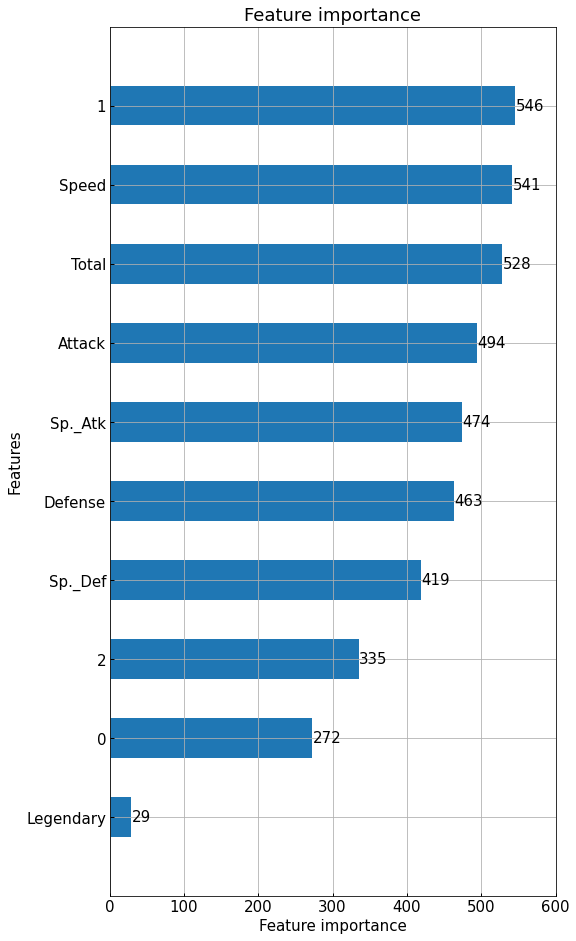

In [211]:
import seaborn as sns
import optuna.integration.lightgbm as lgb
# import lightgbm as lgb
 #LGB用のデータに変形
lgb_train = lgb.Dataset(X_train, Y_train)
lgb_eval = lgb.Dataset(X_test, Y_test)


 #パラメータを指定
params = {'metric': 'rmse',
          "objective":"regression",
          'erbose_eval': -1}#枝の深さ9→2
 #学習させる。スコアも同時に表示してくれる
gbm = lgb.train(params,
               lgb_train,
               valid_sets=(lgb_train, lgb_eval),
               num_boost_round=10000,
               early_stopping_rounds=100,
               verbose_eval=50)
#  特徴量の重要度を表示
lgb.plot_importance(gbm, height=0.5, figsize=(8,16))

In [212]:
# gbm = lgb.train(params,
#                 lgb_train,
#                 valid_sets=lgb_eval,
#                 num_boost_round=10000,
#                 early_stopping_rounds=100,
#                 verbose_eval=50)

In [213]:
predicted = gbm.predict(X_test)

In [214]:
def True_Pred_map(pred_df):
    MAE = mean_absolute_error(pred_df['true'], pred_df['pred'])
    R2 = r2_score(pred_df['true'], pred_df['pred']) 
    plt.figure(figsize=(8,8))
    ax = plt.subplot(111)
    ax.scatter('true', 'pred', data=pred_df)
    ax.set_xlabel('True Value', fontsize=15)
    ax.set_ylabel('Pred Value', fontsize=15)
    ax.set_xlim(pred_df.min().min()-0.1 , pred_df.max().max()+0.1)
    ax.set_ylim(pred_df.min().min()-0.1 , pred_df.max().max()+0.1)
    X = np.linspace(pred_df.min().min()-0.1, pred_df.max().max()+0.1, 2)
    Y = X
    ax.plot(X,Y,'r-')
    plt.text(0.1, 0.9, 'MAE = {}'.format(str(round(MAE, 5))), transform=ax.transAxes, fontsize=15)
    plt.text(0.1, 0.8, 'R^2 = {}'.format(str(round(R2, 5))), transform=ax.transAxes, fontsize=15)

In [215]:
pred_df = pd.concat([Y_test.reset_index(drop=True), pd.Series(predicted)], axis=1)
pred_df.columns = ['true', 'pred']

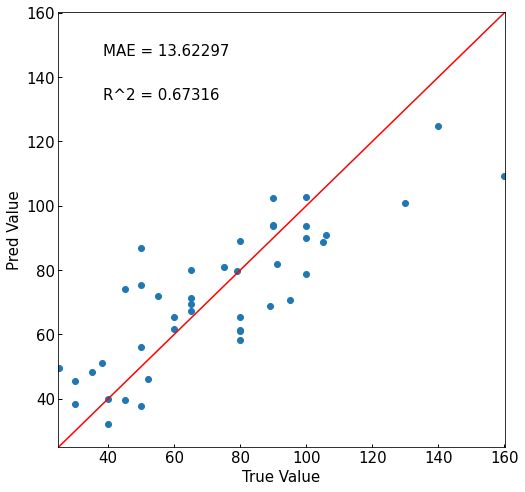

In [216]:
True_Pred_map(pred_df)

In [980]:
MAE_list = []
count = []
for i in range(1, 15):
    params = {'boosting_type': 'gbdt',
          'objective': 'regression',
          'metric': 'mae',
          'max_depth' : i}
    
    gbm = lgb.train(params,
                lgb_train,
                num_boost_round=10000,
                valid_sets=lgb_eval,
                early_stopping_rounds=100,
                verbose_eval=50)
    
    predicted = gbm.predict(X_test)
    pred_df = pd.concat([Y_test.reset_index(drop=True), pd.Series(predicted)], axis=1)
    pred_df.columns = ['true', 'pred']
    MAE = mean_absolute_error(pred_df['true'], pred_df['pred'])
    MAE_list.append(MAE)
    count.append(i)

[I 2020-10-18 10:32:15,532] A new study created in memory with name: no-name-f9e3714a-9f17-4cba-a45f-6f0c758a6c36





  0%|          | 0/7 [00:00<?, ?it/s]




feature_fraction, val_score: inf:   0%|          | 0/7 [00:00<?, ?it/s]

Training until validation scores don't improve for 100 rounds.
[50]	valid_0's l1: 16.3783
[100]	valid_0's l1: 15.7871
[150]	valid_0's l1: 15.6749
[200]	valid_0's l1: 15.7235
[250]	valid_0's l1: 15.6408
[300]	valid_0's l1: 15.4501
[350]	valid_0's l1: 15.2371
[400]	valid_0's l1: 15.0469
[450]	valid_0's l1: 14.9107
[500]	valid_0's l1: 14.8224
[550]	valid_0's l1: 14.7451
[600]	valid_0's l1: 14.6576
[650]	valid_0's l1: 14.5641
[700]	valid_0's l1: 14.4998
[750]	valid_0's l1: 14.4982
[800]	valid_0's l1: 14.4807
[850]	valid_0's l1: 14.4492
[900]	valid_0's l1: 14.4419
[950]	valid_0's l1: 14.3867
[1000]	valid_0's l1: 14.3755
[1050]	valid_0's l1: 14.3232
[1100]	valid_0's l1: 14.3025
[1150]	valid_0's l1: 14.2671
[1200]	valid_0's l1: 14.1936
[1250]	valid_0's l1: 14.1763
[1300]	valid_0's l1: 14.1493
[1350]	valid_0's l1: 14.1265
[1400]	valid_0's l1: 14.0878
[1450]	valid_0's l1: 14.022
[1500]	valid_0's l1: 13.9835
[1550]	valid_0's l1: 13.9367
[1600]	valid_0's l1: 13.9248
[1650]	valid_0's l1: 13.9053
[






feature_fraction, val_score: 13.399530:   0%|          | 0/7 [00:01<?, ?it/s]




feature_fraction, val_score: 13.399530:  14%|#4        | 1/7 [00:01<00:11,  1.88s/it][I 2020-10-18 10:32:17,423] Trial 0 finished with value: 13.399529998140874 and parameters: {'feature_fraction': 0.8}. Best is trial 0 with value: 13.399529998140874.





feature_fraction, val_score: 13.399530:  14%|#4        | 1/7 [00:01<00:11,  1.88s/it]

[3400]	valid_0's l1: 13.4171
[3450]	valid_0's l1: 13.4059
[3500]	valid_0's l1: 13.4238
Early stopping, best iteration is:
[3441]	valid_0's l1: 13.3995
Training until validation scores don't improve for 100 rounds.







feature_fraction, val_score: 13.399530:  14%|#4        | 1/7 [00:02<00:11,  1.88s/it]




feature_fraction, val_score: 13.399530:  29%|##8       | 2/7 [00:02<00:06,  1.36s/it][I 2020-10-18 10:32:17,563] Trial 1 finished with value: 15.66686494407736 and parameters: {'feature_fraction': 0.7}. Best is trial 0 with value: 13.399529998140874.





feature_fraction, val_score: 13.399530:  29%|##8       | 2/7 [00:02<00:06,  1.36s/it]

[50]	valid_0's l1: 16.2929
[100]	valid_0's l1: 15.8121
[150]	valid_0's l1: 15.722
[200]	valid_0's l1: 15.7697
Early stopping, best iteration is:
[131]	valid_0's l1: 15.6669
Training until validation scores don't improve for 100 rounds.
[50]	valid_0's l1: 16.3477
[100]	valid_0's l1: 15.9247
[150]	valid_0's l1: 15.9806
[200]	valid_0's l1: 15.8654
[250]	valid_0's l1: 15.7393
[300]	valid_0's l1: 15.5364
[350]	valid_0's l1: 15.3886
[400]	valid_0's l1: 15.2605
[450]	valid_0's l1: 15.1713
[500]	valid_0's l1: 15.0736
[550]	valid_0's l1: 15.0176
[600]	valid_0's l1: 14.9272
[650]	valid_0's l1: 14.857
[700]	valid_0's l1: 14.8394
[750]	valid_0's l1: 14.7841
[800]	valid_0's l1: 14.7494
[850]	valid_0's l1: 14.6711
[900]	valid_0's l1: 14.6755
[950]	valid_0's l1: 14.6139
[1000]	valid_0's l1: 14.5805
[1050]	valid_0's l1: 14.5583
[1100]	valid_0's l1: 14.5383
[1150]	valid_0's l1: 14.4808
[1200]	valid_0's l1: 14.4239
[1250]	valid_0's l1: 14.3898
[1300]	valid_0's l1: 14.3756
[1350]	valid_0's l1: 14.3036
[1






feature_fraction, val_score: 13.393098:  29%|##8       | 2/7 [00:03<00:06,  1.36s/it]




feature_fraction, val_score: 13.393098:  43%|####2     | 3/7 [00:03<00:06,  1.51s/it][I 2020-10-18 10:32:19,428] Trial 2 finished with value: 13.39309769457454 and parameters: {'feature_fraction': 0.4}. Best is trial 2 with value: 13.39309769457454.





feature_fraction, val_score: 13.393098:  43%|####2     | 3/7 [00:03<00:06,  1.51s/it]

Training until validation scores don't improve for 100 rounds.
[50]	valid_0's l1: 16.3872
[100]	valid_0's l1: 15.9259
[150]	valid_0's l1: 15.9033
[200]	valid_0's l1: 15.9483
[250]	valid_0's l1: 15.8315
[300]	valid_0's l1: 15.5889
[350]	valid_0's l1: 15.3735
[400]	valid_0's l1: 15.1792
[450]	valid_0's l1: 15.0998
[500]	valid_0's l1: 15.0182
[550]	valid_0's l1: 14.948
[600]	valid_0's l1: 14.8735
[650]	valid_0's l1: 14.8204
[700]	valid_0's l1: 14.7414
[750]	valid_0's l1: 14.6986
[800]	valid_0's l1: 14.6517
[850]	valid_0's l1: 14.6058
[900]	valid_0's l1: 14.6041
[950]	valid_0's l1: 14.5831
[1000]	valid_0's l1: 14.5116
[1050]	valid_0's l1: 14.4806
[1100]	valid_0's l1: 14.4598
[1150]	valid_0's l1: 14.3939
[1200]	valid_0's l1: 14.3492
[1250]	valid_0's l1: 14.3061
[1300]	valid_0's l1: 14.26
[1350]	valid_0's l1: 14.2102
[1400]	valid_0's l1: 14.2005
[1450]	valid_0's l1: 14.1809
[1500]	valid_0's l1: 14.1333
[1550]	valid_0's l1: 14.0801
[1600]	valid_0's l1: 14.044
[1650]	valid_0's l1: 14.0147
[170






feature_fraction, val_score: 13.393098:  43%|####2     | 3/7 [00:05<00:06,  1.51s/it]




feature_fraction, val_score: 13.393098:  57%|#####7    | 4/7 [00:05<00:04,  1.56s/it][I 2020-10-18 10:32:21,109] Trial 3 finished with value: 13.414759489738342 and parameters: {'feature_fraction': 0.5}. Best is trial 2 with value: 13.39309769457454.





feature_fraction, val_score: 13.393098:  57%|#####7    | 4/7 [00:05<00:04,  1.56s/it]

[3350]	valid_0's l1: 13.4261
[3400]	valid_0's l1: 13.4306
Early stopping, best iteration is:
[3345]	valid_0's l1: 13.4148
Training until validation scores don't improve for 100 rounds.
[50]	valid_0's l1: 16.2682
[100]	valid_0's l1: 15.7463







feature_fraction, val_score: 13.393098:  57%|#####7    | 4/7 [00:05<00:04,  1.56s/it]




feature_fraction, val_score: 13.393098:  71%|#######1  | 5/7 [00:05<00:02,  1.13s/it][I 2020-10-18 10:32:21,246] Trial 4 finished with value: 15.621929615527392 and parameters: {'feature_fraction': 0.8999999999999999}. Best is trial 2 with value: 13.39309769457454.





feature_fraction, val_score: 13.393098:  71%|#######1  | 5/7 [00:05<00:02,  1.13s/it]

[150]	valid_0's l1: 15.6397
[200]	valid_0's l1: 15.7474
Early stopping, best iteration is:
[128]	valid_0's l1: 15.6219
Training until validation scores don't improve for 100 rounds.
[50]	valid_0's l1: 16.3205
[100]	valid_0's l1: 15.8764
[150]	valid_0's l1: 15.778
[200]	valid_0's l1: 15.8342
[250]	valid_0's l1: 15.7182
[300]	valid_0's l1: 15.5532
[350]	valid_0's l1: 15.3412
[400]	valid_0's l1: 15.1472
[450]	valid_0's l1: 15.0093
[500]	valid_0's l1: 14.9366
[550]	valid_0's l1: 14.86
[600]	valid_0's l1: 14.8397
[650]	valid_0's l1: 14.7491
[700]	valid_0's l1: 14.6985
[750]	valid_0's l1: 14.6343
[800]	valid_0's l1: 14.5588
[850]	valid_0's l1: 14.5446
[900]	valid_0's l1: 14.5112
[950]	valid_0's l1: 14.5036
[1000]	valid_0's l1: 14.473
[1050]	valid_0's l1: 14.427
[1100]	valid_0's l1: 14.3781
[1150]	valid_0's l1: 14.3424
[1200]	valid_0's l1: 14.2974
[1250]	valid_0's l1: 14.2431
[1300]	valid_0's l1: 14.1943
[1350]	valid_0's l1: 14.1498
[1400]	valid_0's l1: 14.1179
[1450]	valid_0's l1: 14.0817
[1






feature_fraction, val_score: 13.393098:  71%|#######1  | 5/7 [00:06<00:02,  1.13s/it]




feature_fraction, val_score: 13.393098:  86%|########5 | 6/7 [00:06<00:01,  1.06s/it][I 2020-10-18 10:32:22,132] Trial 5 finished with value: 13.834340461672657 and parameters: {'feature_fraction': 0.6}. Best is trial 2 with value: 13.39309769457454.





feature_fraction, val_score: 13.393098:  86%|########5 | 6/7 [00:06<00:01,  1.06s/it]

[1800]	valid_0's l1: 13.8509
[1850]	valid_0's l1: 13.8502
[1900]	valid_0's l1: 13.8443
Early stopping, best iteration is:
[1806]	valid_0's l1: 13.8343
Training until validation scores don't improve for 100 rounds.
[50]	valid_0's l1: 16.3686
[100]	valid_0's l1: 15.8308
[150]	valid_0's l1: 15.7443







feature_fraction, val_score: 13.393098:  86%|########5 | 6/7 [00:06<00:01,  1.06s/it]




feature_fraction, val_score: 13.393098: 100%|##########| 7/7 [00:06<00:00,  1.04it/s]





  0%|          | 0/20 [00:00<?, ?it/s]




num_leaves, val_score: 13.393098:   0%|          | 0/20 [00:00<?, ?it/s]

[200]	valid_0's l1: 15.7423
Early stopping, best iteration is:
[133]	valid_0's l1: 15.6712
Training until validation scores don't improve for 100 rounds.
[50]	valid_0's l1: 16.3477
[100]	valid_0's l1: 15.9247
[150]	valid_0's l1: 15.9806
[200]	valid_0's l1: 15.8654
[250]	valid_0's l1: 15.7393
[300]	valid_0's l1: 15.5364
[350]	valid_0's l1: 15.3886
[400]	valid_0's l1: 15.2605
[450]	valid_0's l1: 15.1713
[500]	valid_0's l1: 15.0736
[550]	valid_0's l1: 15.0176
[600]	valid_0's l1: 14.9272
[650]	valid_0's l1: 14.857
[700]	valid_0's l1: 14.8394
[750]	valid_0's l1: 14.7841
[800]	valid_0's l1: 14.7494
[850]	valid_0's l1: 14.6711
[900]	valid_0's l1: 14.6755
[950]	valid_0's l1: 14.6139
[1000]	valid_0's l1: 14.5805
[1050]	valid_0's l1: 14.5583
[1100]	valid_0's l1: 14.5383
[1150]	valid_0's l1: 14.4808
[1200]	valid_0's l1: 14.4239
[1250]	valid_0's l1: 14.3898
[1300]	valid_0's l1: 14.3756
[1350]	valid_0's l1: 14.3036
[1400]	valid_0's l1: 14.2369
[1450]	valid_0's l1: 14.2428
[1500]	valid_0's l1: 14.22






num_leaves, val_score: 13.393098:   0%|          | 0/20 [00:00<?, ?it/s]




num_leaves, val_score: 13.393098:   5%|5         | 1/20 [00:00<00:06,  2.96it/s][I 2020-10-18 10:32:22,652] Trial 7 finished with value: 13.39309769457454 and parameters: {'num_leaves': 2}. Best is trial 7 with value: 13.39309769457454.







[2100]	valid_0's l1: 13.8545
[2150]	valid_0's l1: 13.8299
[2200]	valid_0's l1: 13.818
[2250]	valid_0's l1: 13.8146
[2300]	valid_0's l1: 13.7979
[2350]	valid_0's l1: 13.7844
[2400]	valid_0's l1: 13.7841
[2450]	valid_0's l1: 13.777
[2500]	valid_0's l1: 13.752
[2550]	valid_0's l1: 13.7483
[2600]	valid_0's l1: 13.7183
[2650]	valid_0's l1: 13.7077
[2700]	valid_0's l1: 13.7017
[2750]	valid_0's l1: 13.6797
[2800]	valid_0's l1: 13.6615
[2850]	valid_0's l1: 13.6548
[2900]	valid_0's l1: 13.6221
[2950]	valid_0's l1: 13.6085
[3000]	valid_0's l1: 13.5912
[3050]	valid_0's l1: 13.5606
[3100]	valid_0's l1: 13.554
[3150]	valid_0's l1: 13.5509
[3200]	valid_0's l1: 13.5273
[3250]	valid_0's l1: 13.5135
[3300]	valid_0's l1: 13.4876
[3350]	valid_0's l1: 13.4803
[3400]	valid_0's l1: 13.456
[3450]	valid_0's l1: 13.4508
[3500]	valid_0's l1: 13.4328
[3550]	valid_0's l1: 13.4329
[3600]	valid_0's l1: 13.4211
[3650]	valid_0's l1: 13.4042
[3700]	valid_0's l1: 13.3999
[3750]	valid_0's l1: 13.4057
[3800]	valid_0's l1

num_leaves, val_score: 13.393098:   5%|5         | 1/20 [00:00<00:06,  2.96it/s]

Training until validation scores don't improve for 100 rounds.
[50]	valid_0's l1: 16.3477
[100]	valid_0's l1: 15.9247
[150]	valid_0's l1: 15.9806
[200]	valid_0's l1: 15.8654
[250]	valid_0's l1: 15.7393
[300]	valid_0's l1: 15.5364
[350]	valid_0's l1: 15.3886
[400]	valid_0's l1: 15.2605
[450]	valid_0's l1: 15.1713
[500]	valid_0's l1: 15.0736
[550]	valid_0's l1: 15.0176
[600]	valid_0's l1: 14.9272
[650]	valid_0's l1: 14.857
[700]	valid_0's l1: 14.8394
[750]	valid_0's l1: 14.7841
[800]	valid_0's l1: 14.7494
[850]	valid_0's l1: 14.6711
[900]	valid_0's l1: 14.6755
[950]	valid_0's l1: 14.6139
[1000]	valid_0's l1: 14.5805
[1050]	valid_0's l1: 14.5583
[1100]	valid_0's l1: 14.5383
[1150]	valid_0's l1: 14.4808
[1200]	valid_0's l1: 14.4239
[1250]	valid_0's l1: 14.3898
[1300]	valid_0's l1: 14.3756
[1350]	valid_0's l1: 14.3036
[1400]	valid_0's l1: 14.2369
[1450]	valid_0's l1: 14.2428
[1500]	valid_0's l1: 14.2216
[1550]	valid_0's l1: 14.1497
[1600]	valid_0's l1: 14.1125
[1650]	valid_0's l1: 14.0836
[






num_leaves, val_score: 13.393098:   5%|5         | 1/20 [00:00<00:06,  2.96it/s]




num_leaves, val_score: 13.393098:  10%|#         | 2/20 [00:00<00:06,  2.96it/s][I 2020-10-18 10:32:22,986] Trial 8 finished with value: 13.39309769457454 and parameters: {'num_leaves': 2}. Best is trial 7 with value: 13.39309769457454.





num_leaves, val_score: 13.393098:  10%|#         | 2/20 [00:00<00:06,  2.96it/s]

[3500]	valid_0's l1: 13.4328
[3550]	valid_0's l1: 13.4329
[3600]	valid_0's l1: 13.4211
[3650]	valid_0's l1: 13.4042
[3700]	valid_0's l1: 13.3999
[3750]	valid_0's l1: 13.4057
[3800]	valid_0's l1: 13.4102
Early stopping, best iteration is:
[3713]	valid_0's l1: 13.3931
Training until validation scores don't improve for 100 rounds.
[50]	valid_0's l1: 16.3477
[100]	valid_0's l1: 15.9247
[150]	valid_0's l1: 15.9806
[200]	valid_0's l1: 15.8654
[250]	valid_0's l1: 15.7393
[300]	valid_0's l1: 15.5364
[350]	valid_0's l1: 15.3886
[400]	valid_0's l1: 15.2605
[450]	valid_0's l1: 15.1713
[500]	valid_0's l1: 15.0736
[550]	valid_0's l1: 15.0176
[600]	valid_0's l1: 14.9272
[650]	valid_0's l1: 14.857


KeyboardInterrupt: ignored

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(count, MAE_list, marker="o")
plt.title("MAE Values", fontsize=30)
plt.xlabel("max_depth", fontsize=20)
plt.ylabel("MAE Value", fontsize=20)
plt.grid(True)

In [ ]:
# lgb.LGBMClassifier()

In [ ]:
# MAE_list = []
# count = []
# for i in range(1,100,10):
#     params = {'boosting_type': 'gbdt',
#           'objective': 'regression',
#           'metric': 'mae',
#           ' num_leaves ' : i}
    
#     gbm = lgb.train(params,
#                 lgb_train,
#                 num_boost_round=10000,
#                 valid_sets=lgb_eval,
#                 early_stopping_rounds=100,
#                 verbose_eval=50)
    
#     predicted = gbm.predict(X_test)
#     pred_df = pd.concat([Y_test.reset_index(drop=True), pd.Series(predicted)], axis=1)
#     pred_df.columns = ['true', 'pred']
#     MAE = mean_absolute_error(pred_df['true'], pred_df['pred'])
#     MAE_list.append(MAE)
#     count.append(i)

In [ ]:
# plt.figure(figsize=(16,8))
# plt.plot(count, MAE_list, marker="o")
# plt.title("MAE Values", fontsize=30)
# plt.xlabel("min_data_in_leaf", fontsize=20)
# plt.ylabel("MAE Value", fontsize=20)
# plt.grid(True)

In [ ]:
# from sklearn.metrics import r2_score 
# from sklearn.metrics import accuracy_score
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.linear_model import LinearRegression
# # print("正解率：",accuracy_score(Y_test,Y_predict))
# # print(r2_score(lr_predict,Y_test))
# lr=LinearRegression()
# RFR =RandomForestRegressor()

In [ ]:
# RFR.fit(X_train,Y_train)
# lr.fit(X_train,Y_train)

In [ ]:
# Y_RFR=RFR.predict(X_test)
# Y_lr=lr.predict(X_test)
# print("MAE",mean_absolute_error(Y_test,Y_lr))
# print("R2",r2_score(Y_test,Y_lr))

In [ ]:
# from sklearn.metrics import confusion_matrix
# print(confusion_matrix(Y_test,Y_predict))

In [ ]:
# lgb_train = lgb.Dataset(X_train, Y_train)
# lgb_eval = lgb.Dataset(X_test, Y_test, reference=lgb_train)
# # LightGBM parameters
# params = {
#         'task' : 'train',
#         'boosting_type' : 'gbdt',
#         'objective' : 'regression',
#         'metric' : {'l2'},
#         'num_leaves' : 31,
#         'learning_rate' : 0.1,
#         'feature_fraction' : 0.9,
#         'bagging_fraction' : 0.8,
#         'bagging_freq': 5,
#         'verbose' : 0}

In [ ]:
# gbm = lgb.train(params,
#             lgb_train,
#             num_boost_round=10000,
#             valid_sets=lgb_eval,
#             early_stopping_rounds=1000)
# Y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration)

In [ ]:
# print(r2_score(Y_test,Y_pred))